# Chirped Z-transform for vector XY scheme to X scheme


In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import matplotlib 
matplotlib.rcParams['figure.dpi'] = 250

In [24]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_XY import Scalar_field_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.utils_math import Bluestein_dft_xy


In [25]:
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY

In [26]:
from numpy import (linspace, sin, cos, arcsin, arctan2, exp, sqrt, pi,
                   meshgrid, isnan, tile, real, angle, sign, mod, ones, zeros)
from numpy.fft import fft, ifft, fftshift

## Example

In [27]:
size = 25 * um
x0 = np.linspace(-size / 2, size / 2, 512)
y0 = np.linspace(-size / 2, size / 2, 512)

focal = 16 * um
wavelength = 0.6328 * um


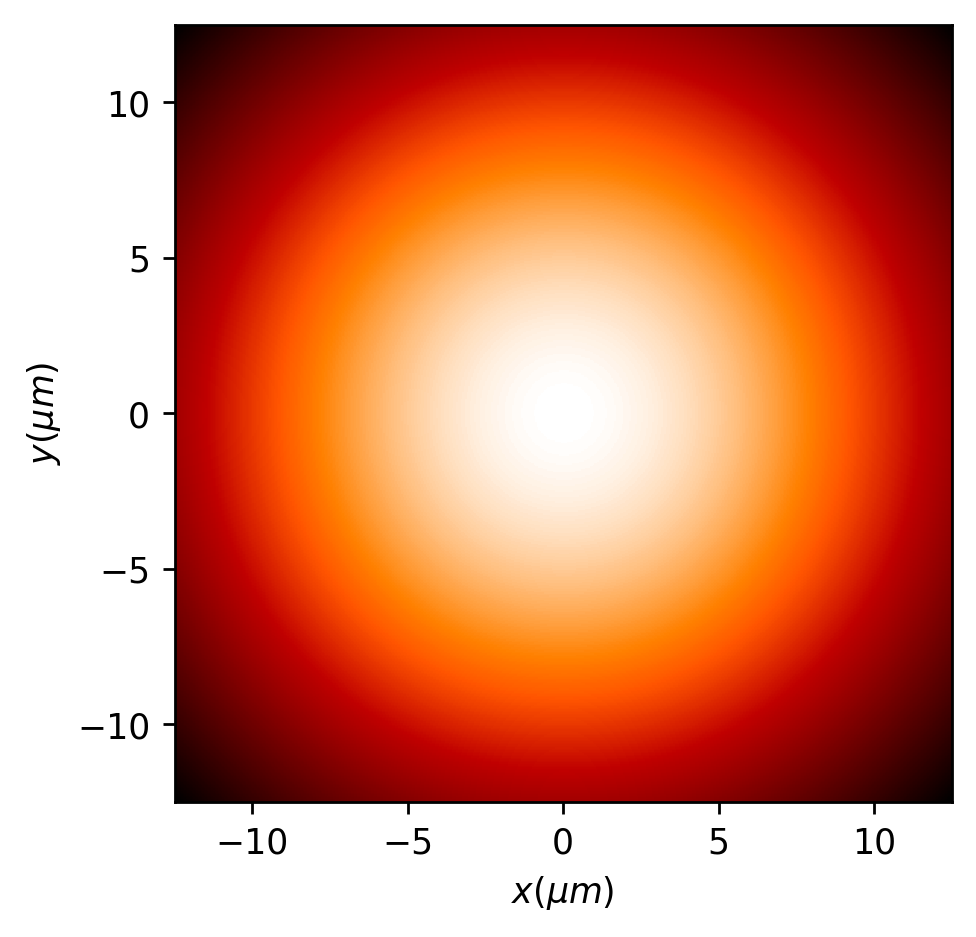

In [28]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0, 0),
              w0=(32 * um, 32 * um),
              z0=0 * um,
              A=1,
              theta=0. * degrees,
              phi=0 * degrees)

u0.draw()

t1 = Scalar_mask_XY(x0, y0, wavelength)

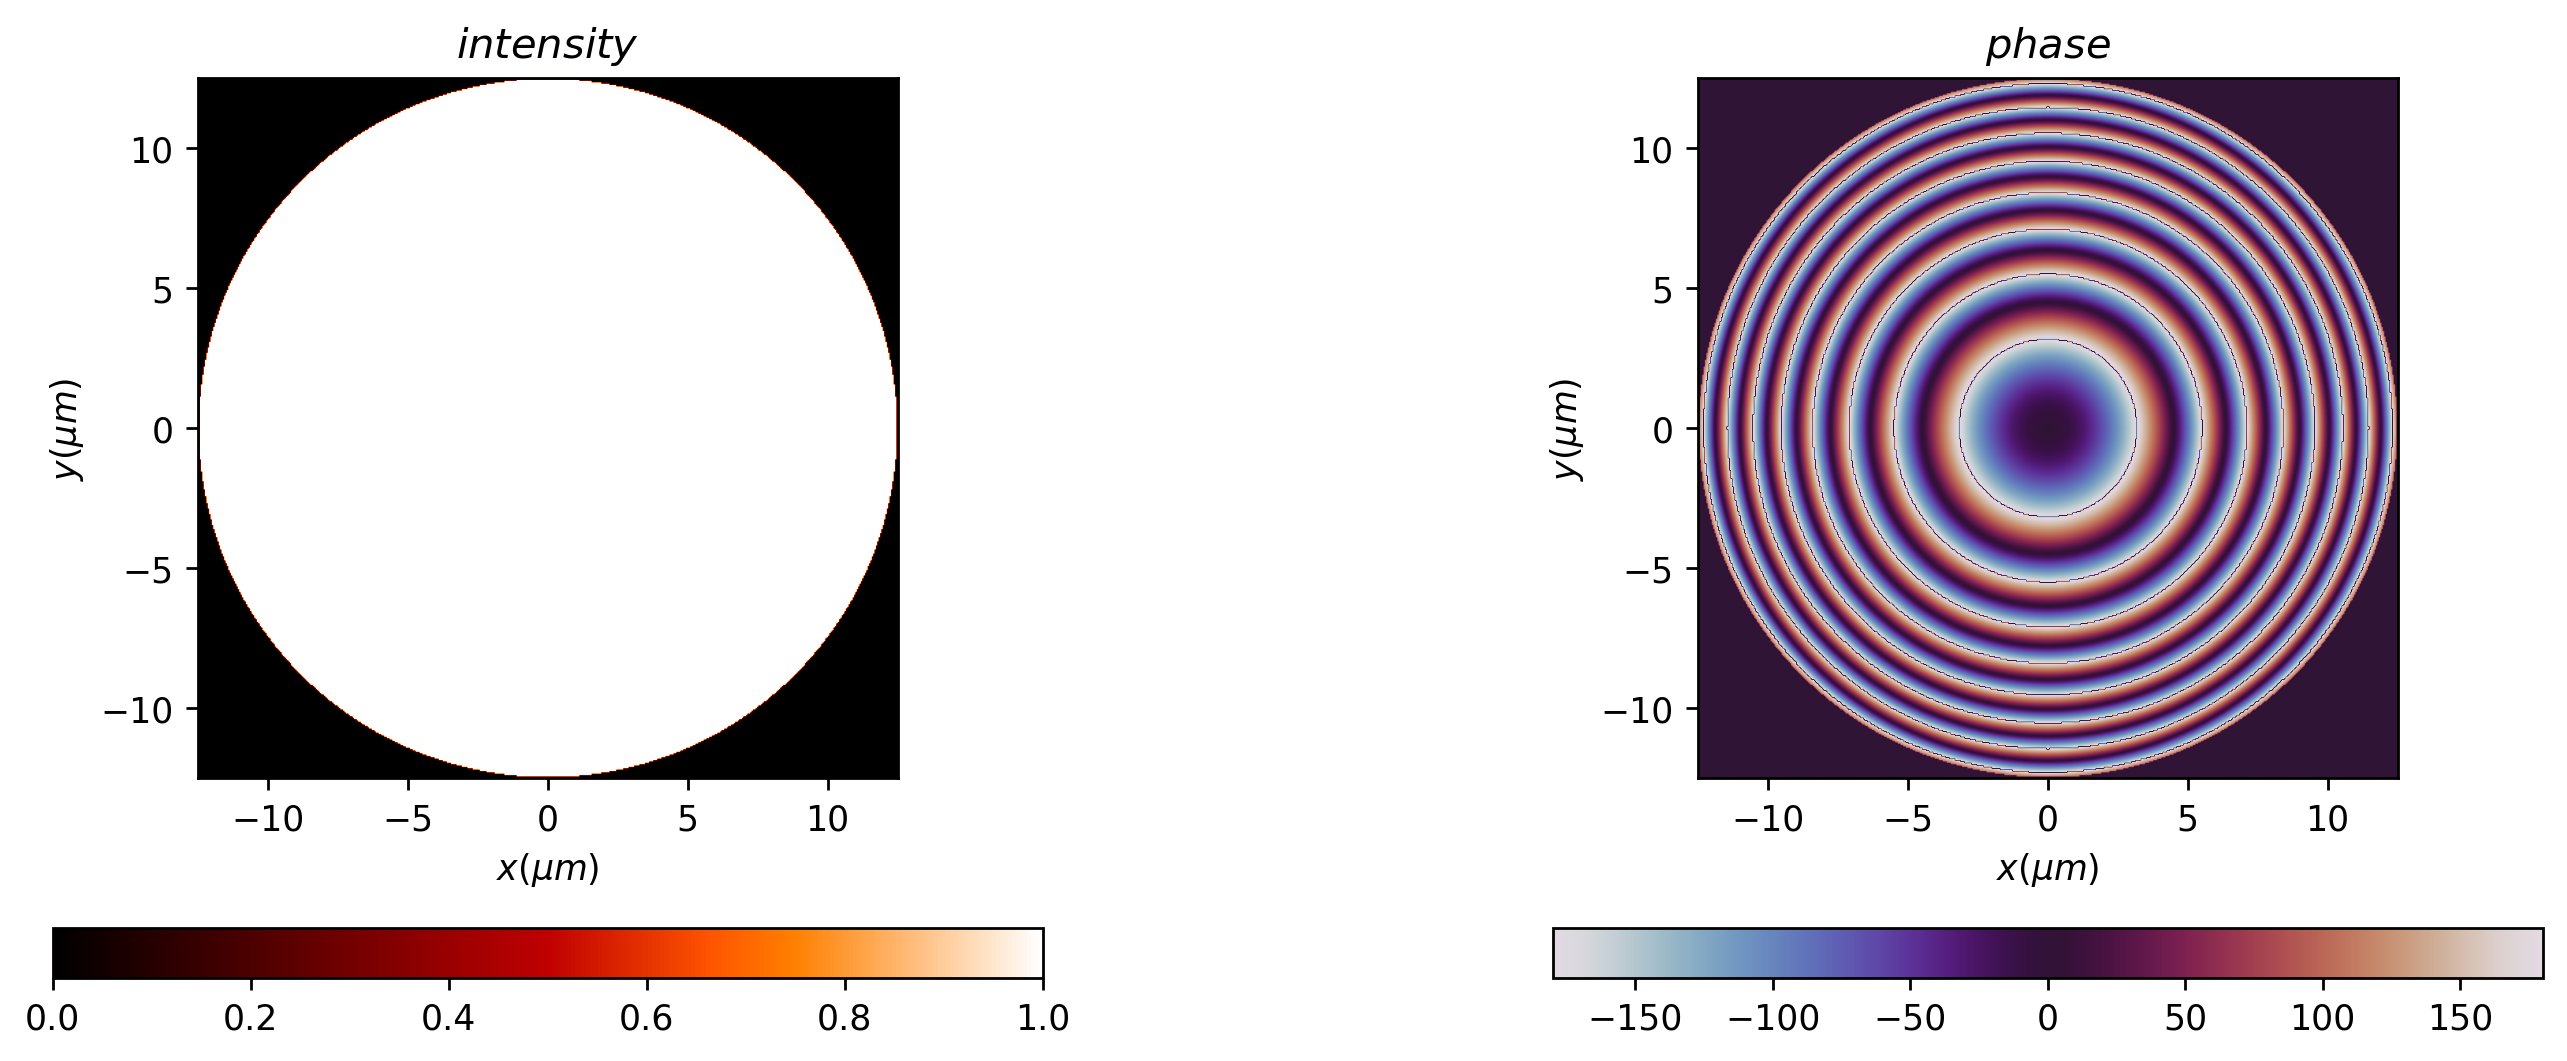

In [29]:
t = Scalar_mask_XY(x0, y0, wavelength)
t.lens(r0=(0, 0), focal=focal, radius=size / 2)
t.draw('field');


In [30]:
u1 = t * u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_wave(u=u1, v=(1, 0))
#EM1.azimuthal_wave(u=u1, r0=(0, 0), radius=(20, 20))
#EM1.radial_wave(u=u1, r0=(0, 0), radius=(20, 20))


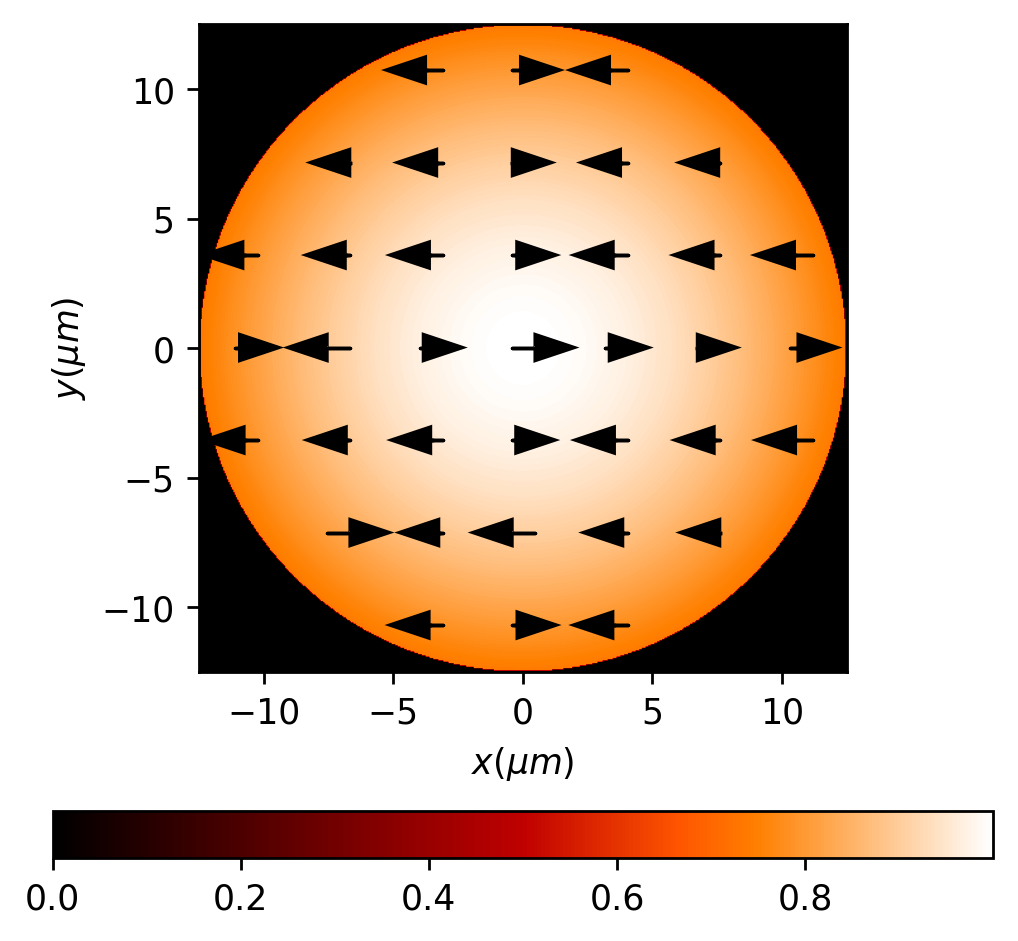

In [31]:
EM1.draw(kind='ellipses', amplification=0.25, num_ellipses=(11,11), color_line='k')


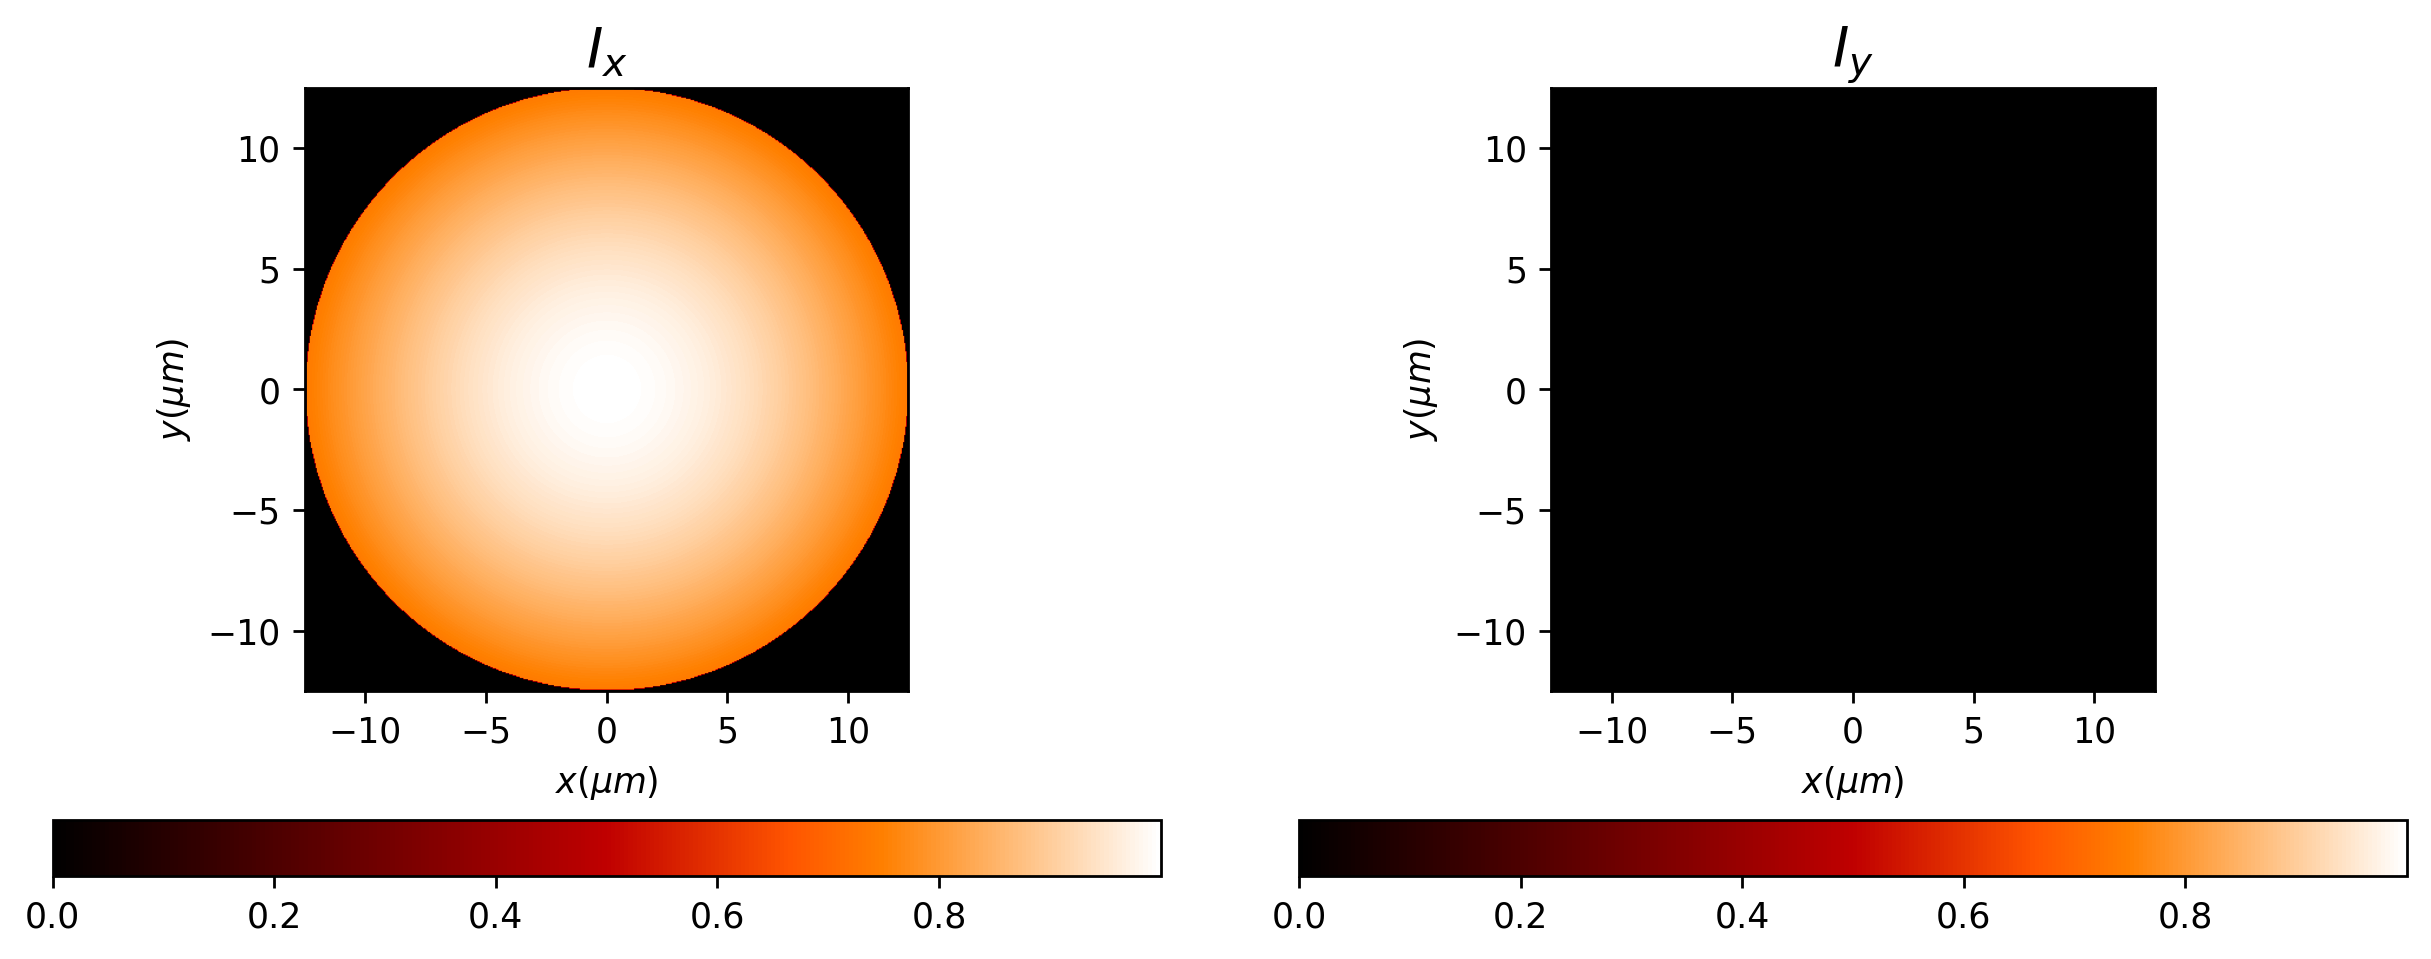

In [32]:
EM1.draw('intensities', logarithm=0);


## Algorithm

# Execution

## xout: 0D, yout: 0D, z: 0D


In [33]:
x_out = 0.
y_out = 0.
z = focal


In [34]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out)
print(EM2_1D)


((12.01931943234928-2.910555097903726j), 0j, (-3.3306690738754696e-16-5.551115123125783e-16j))
CPU times: user 149 ms, sys: 11.3 ms, total: 161 ms
Wall time: 160 ms


## xout: 1D, yout: 0D, z: 0D


In [35]:
size_out = 16 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 512)
y_out = 0.
z = focal


CPU times: user 196 ms, sys: 20.9 ms, total: 216 ms
Wall time: 216 ms


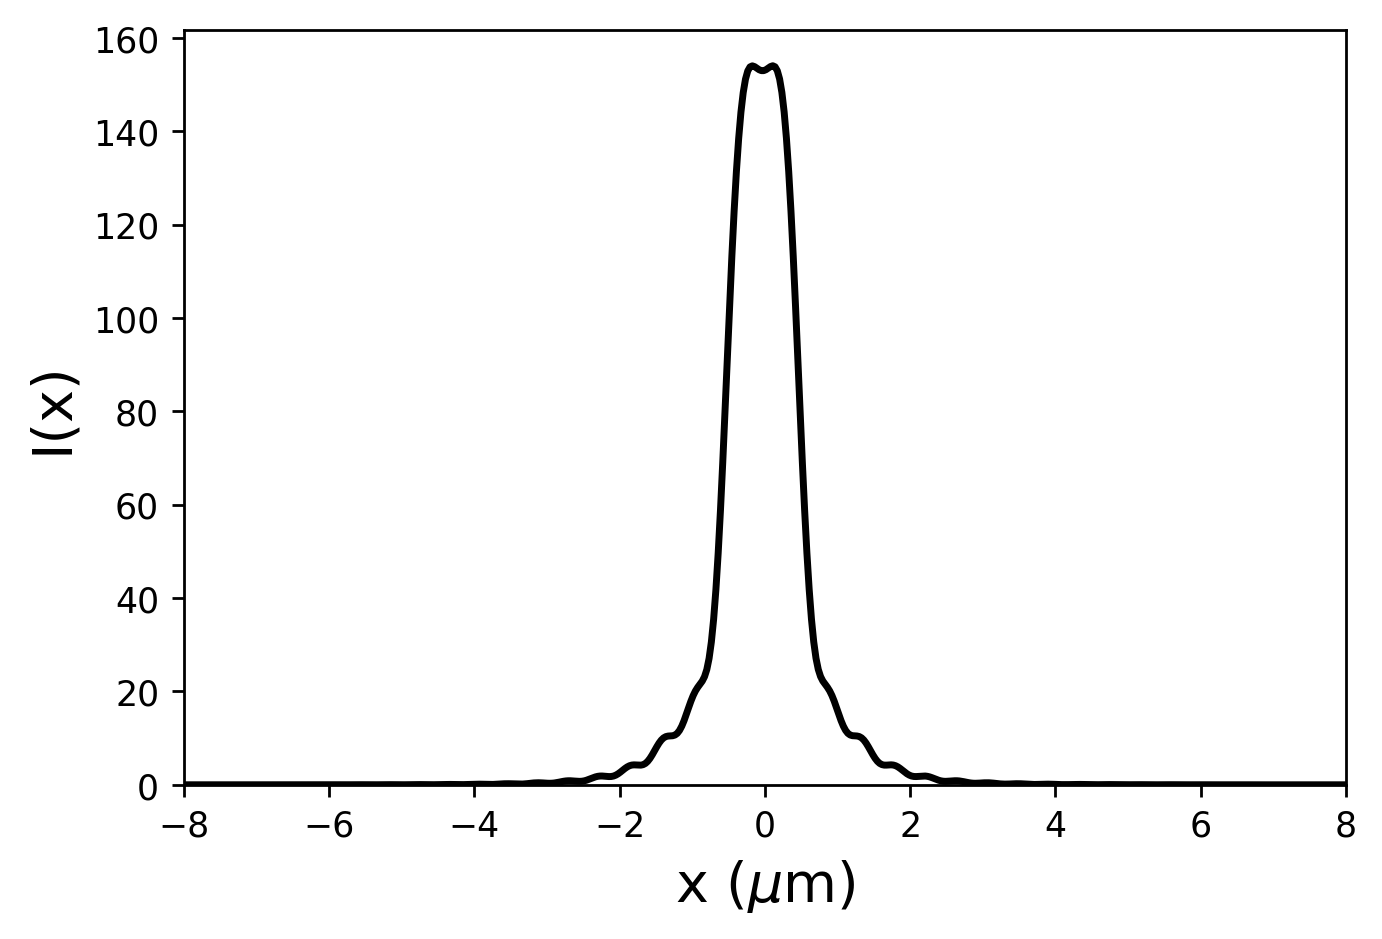

In [36]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out)
EM2_1D.draw('intensity');

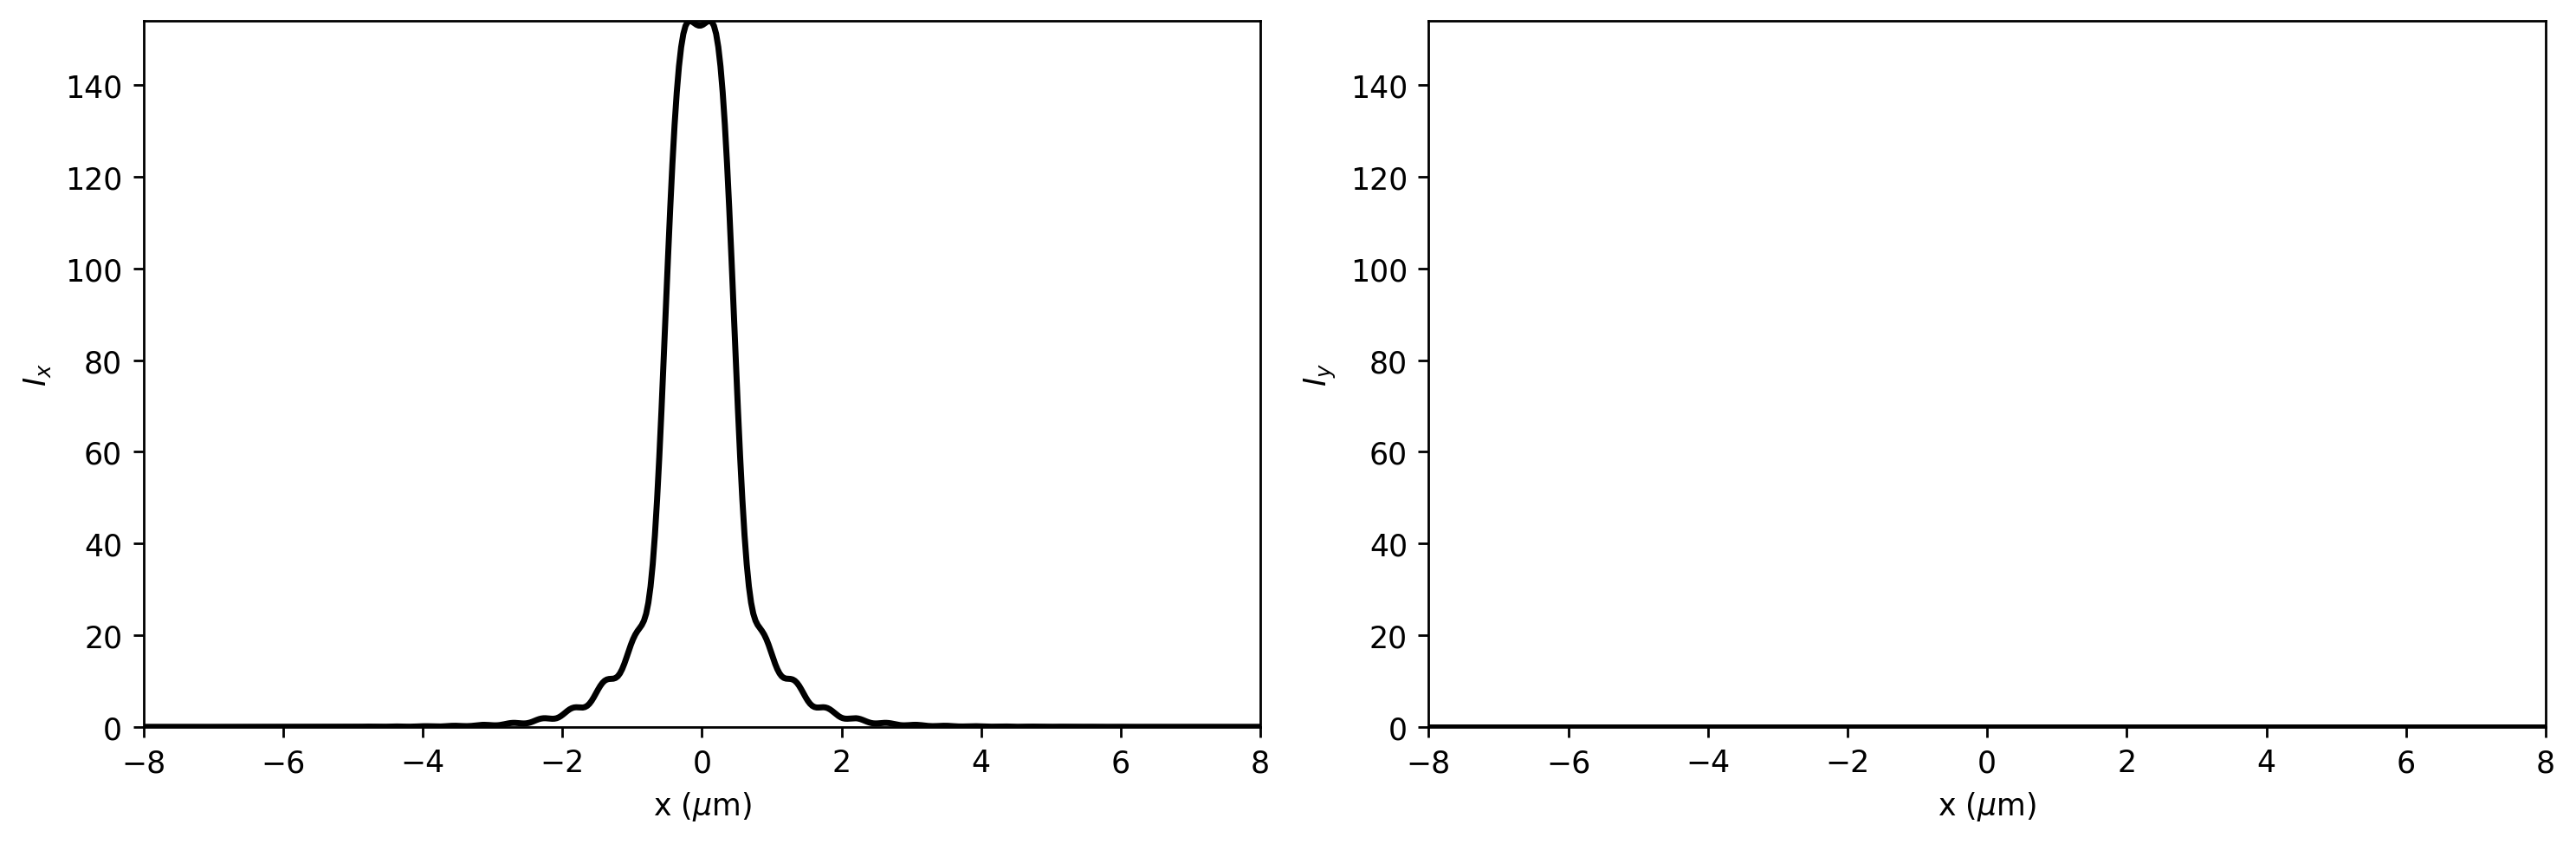

In [37]:
EM2_1D.draw('intensities');


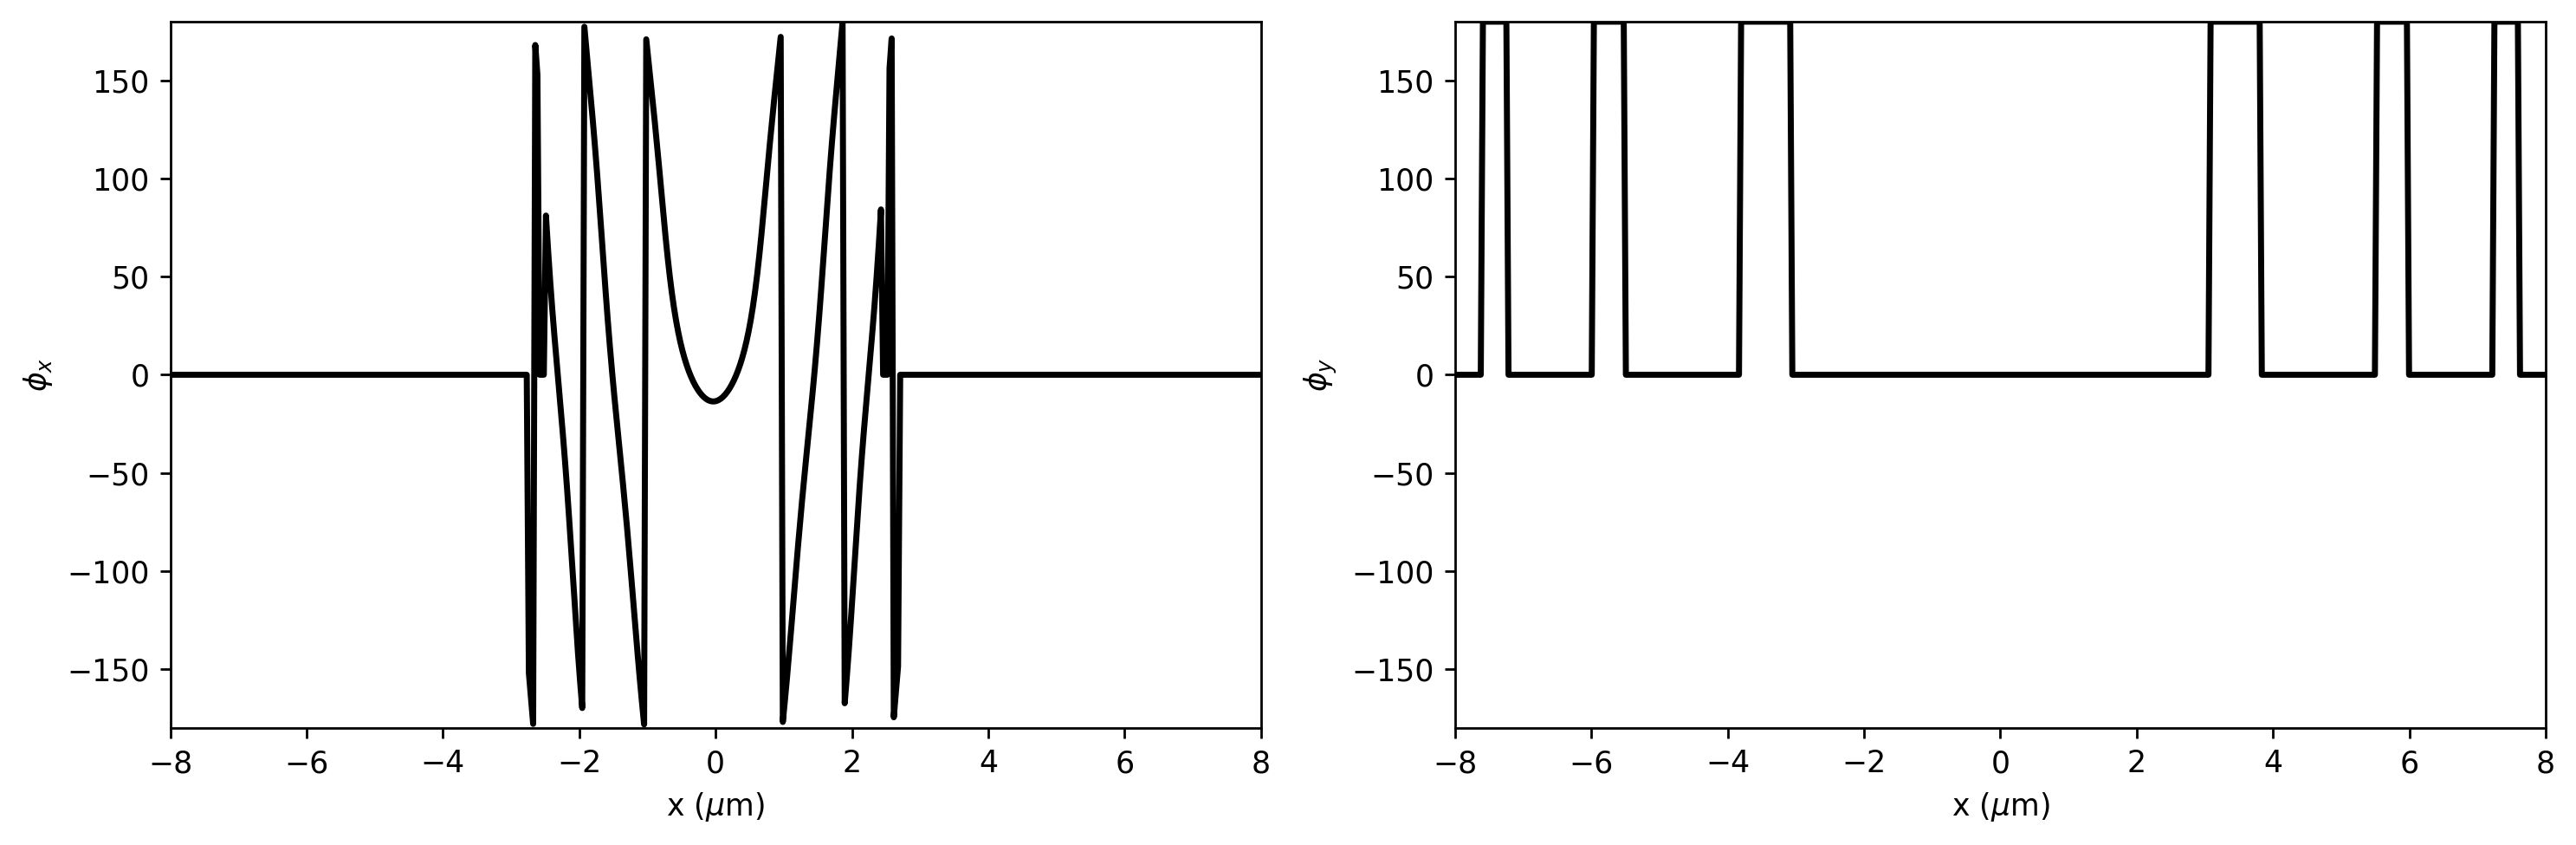

In [38]:
EM2_1D.draw('phases');

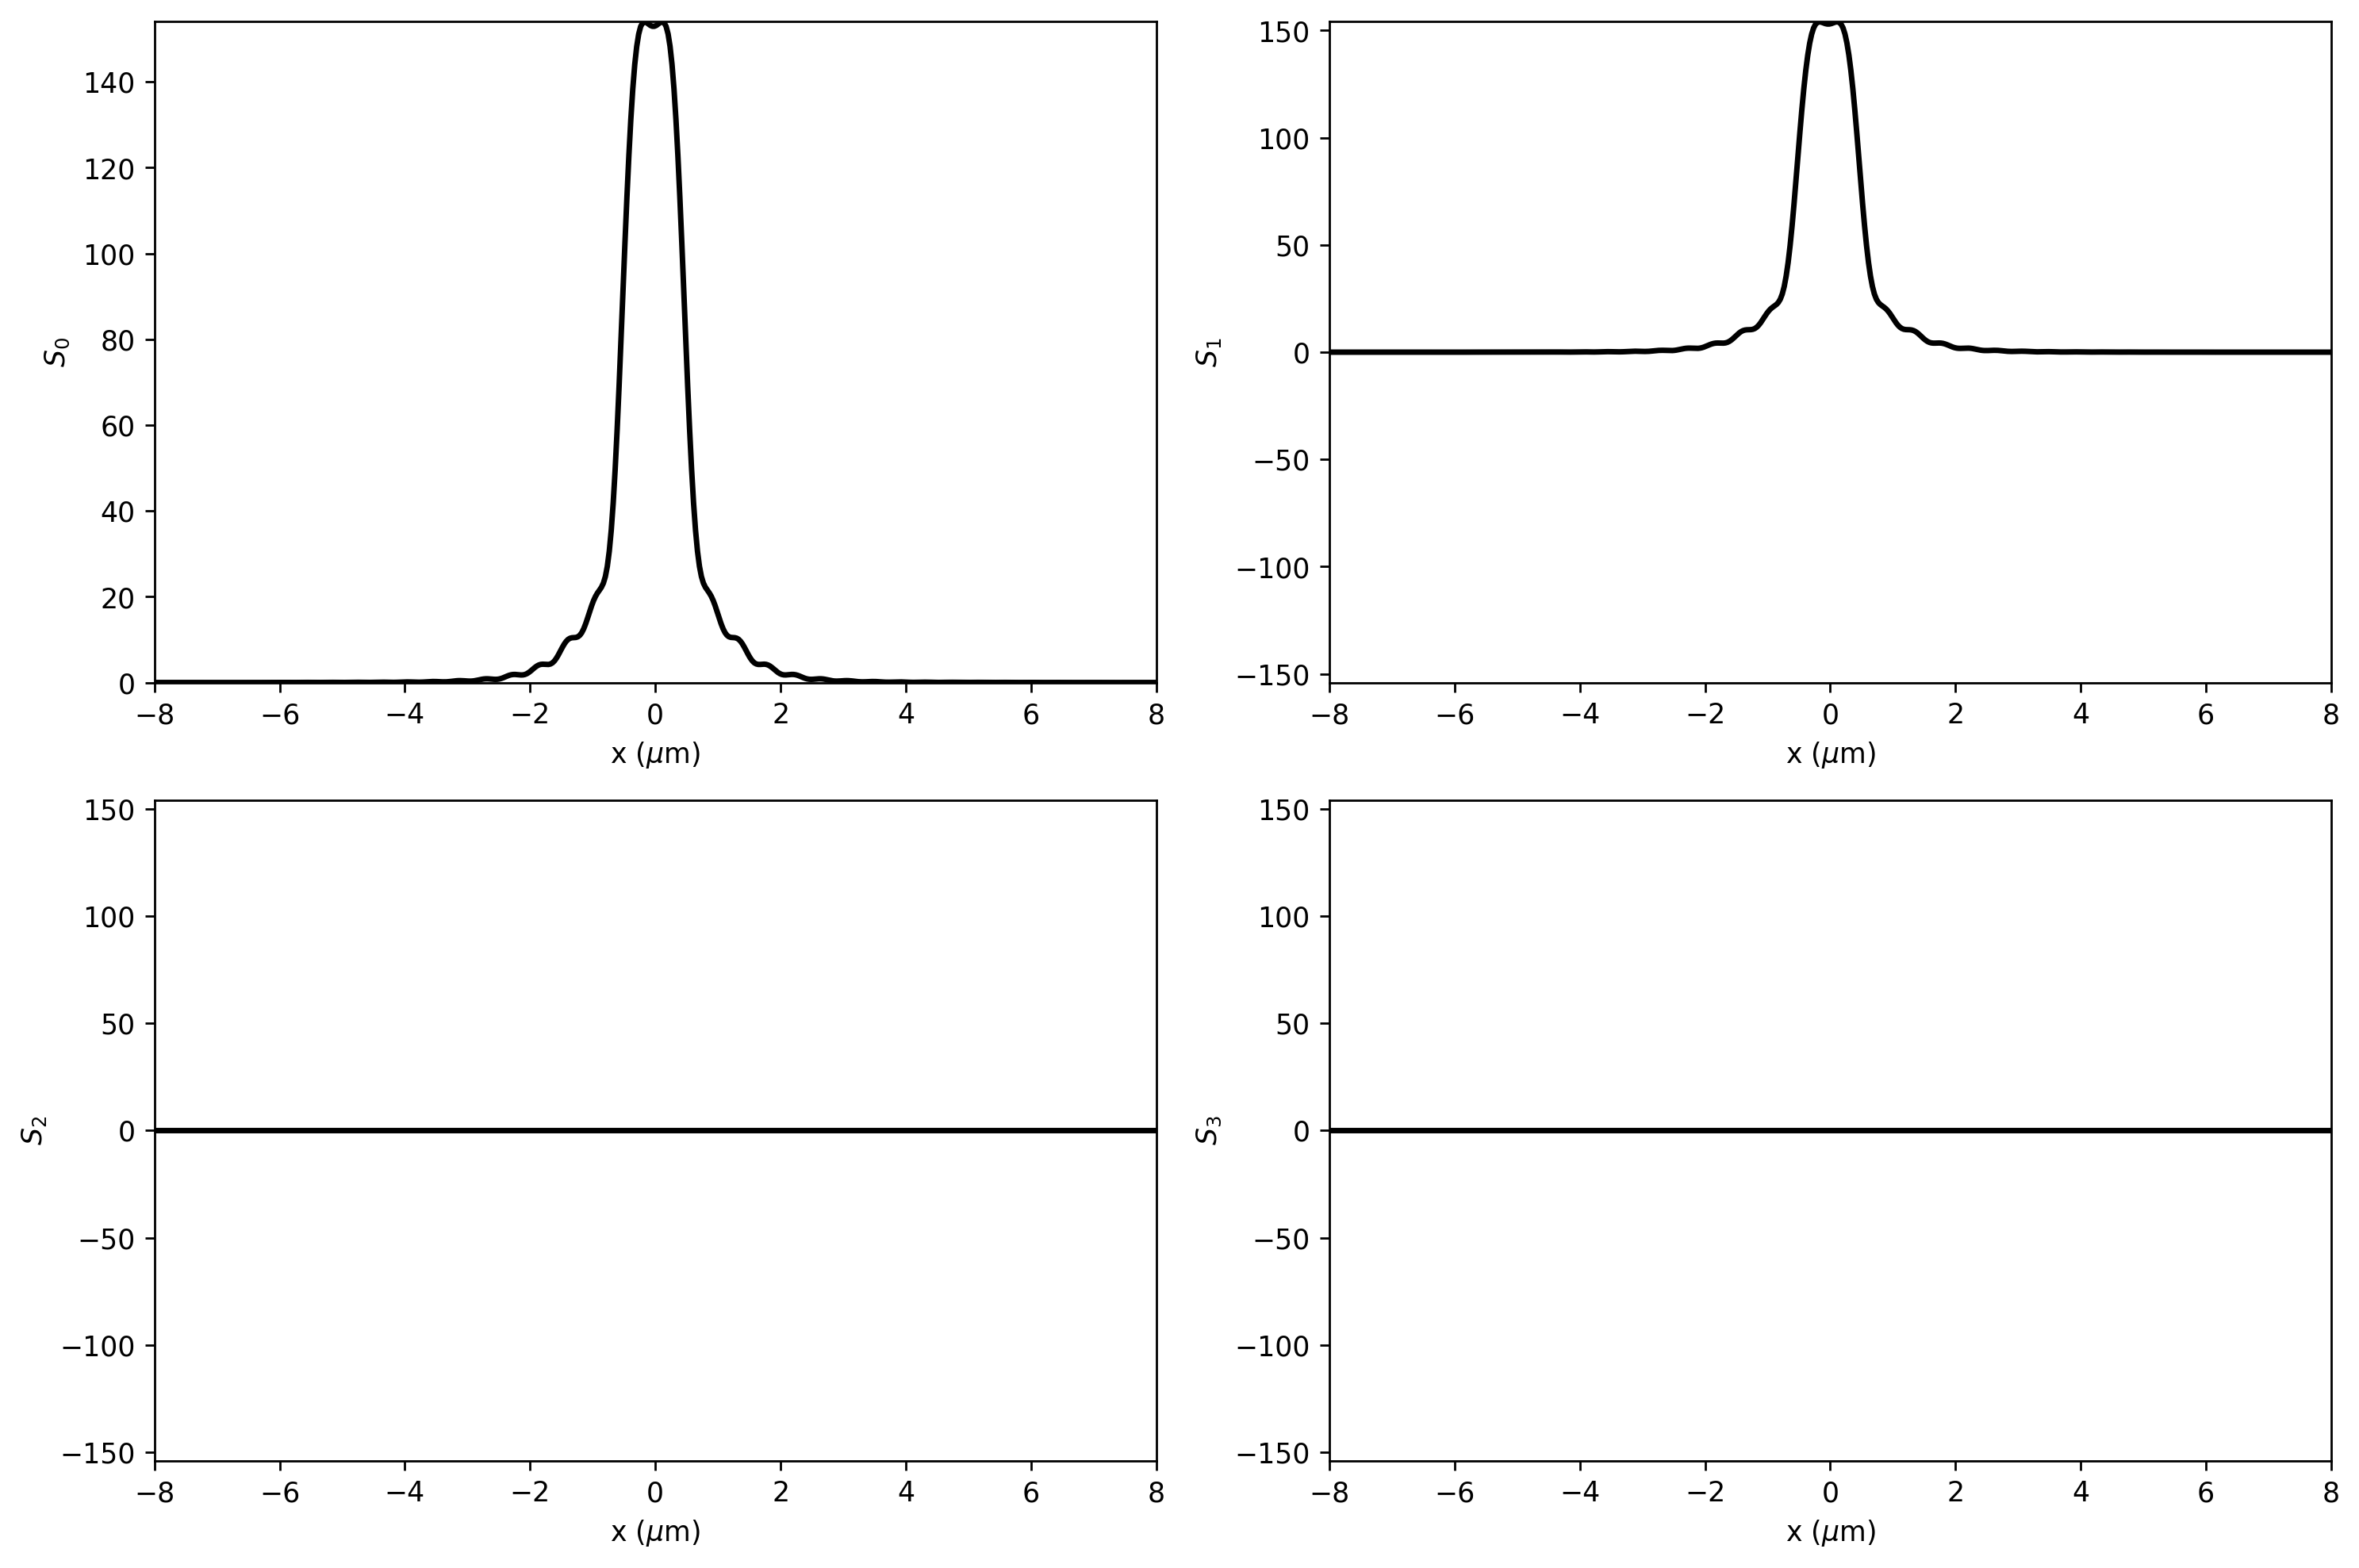

In [39]:
EM2_1D.draw('stokes');

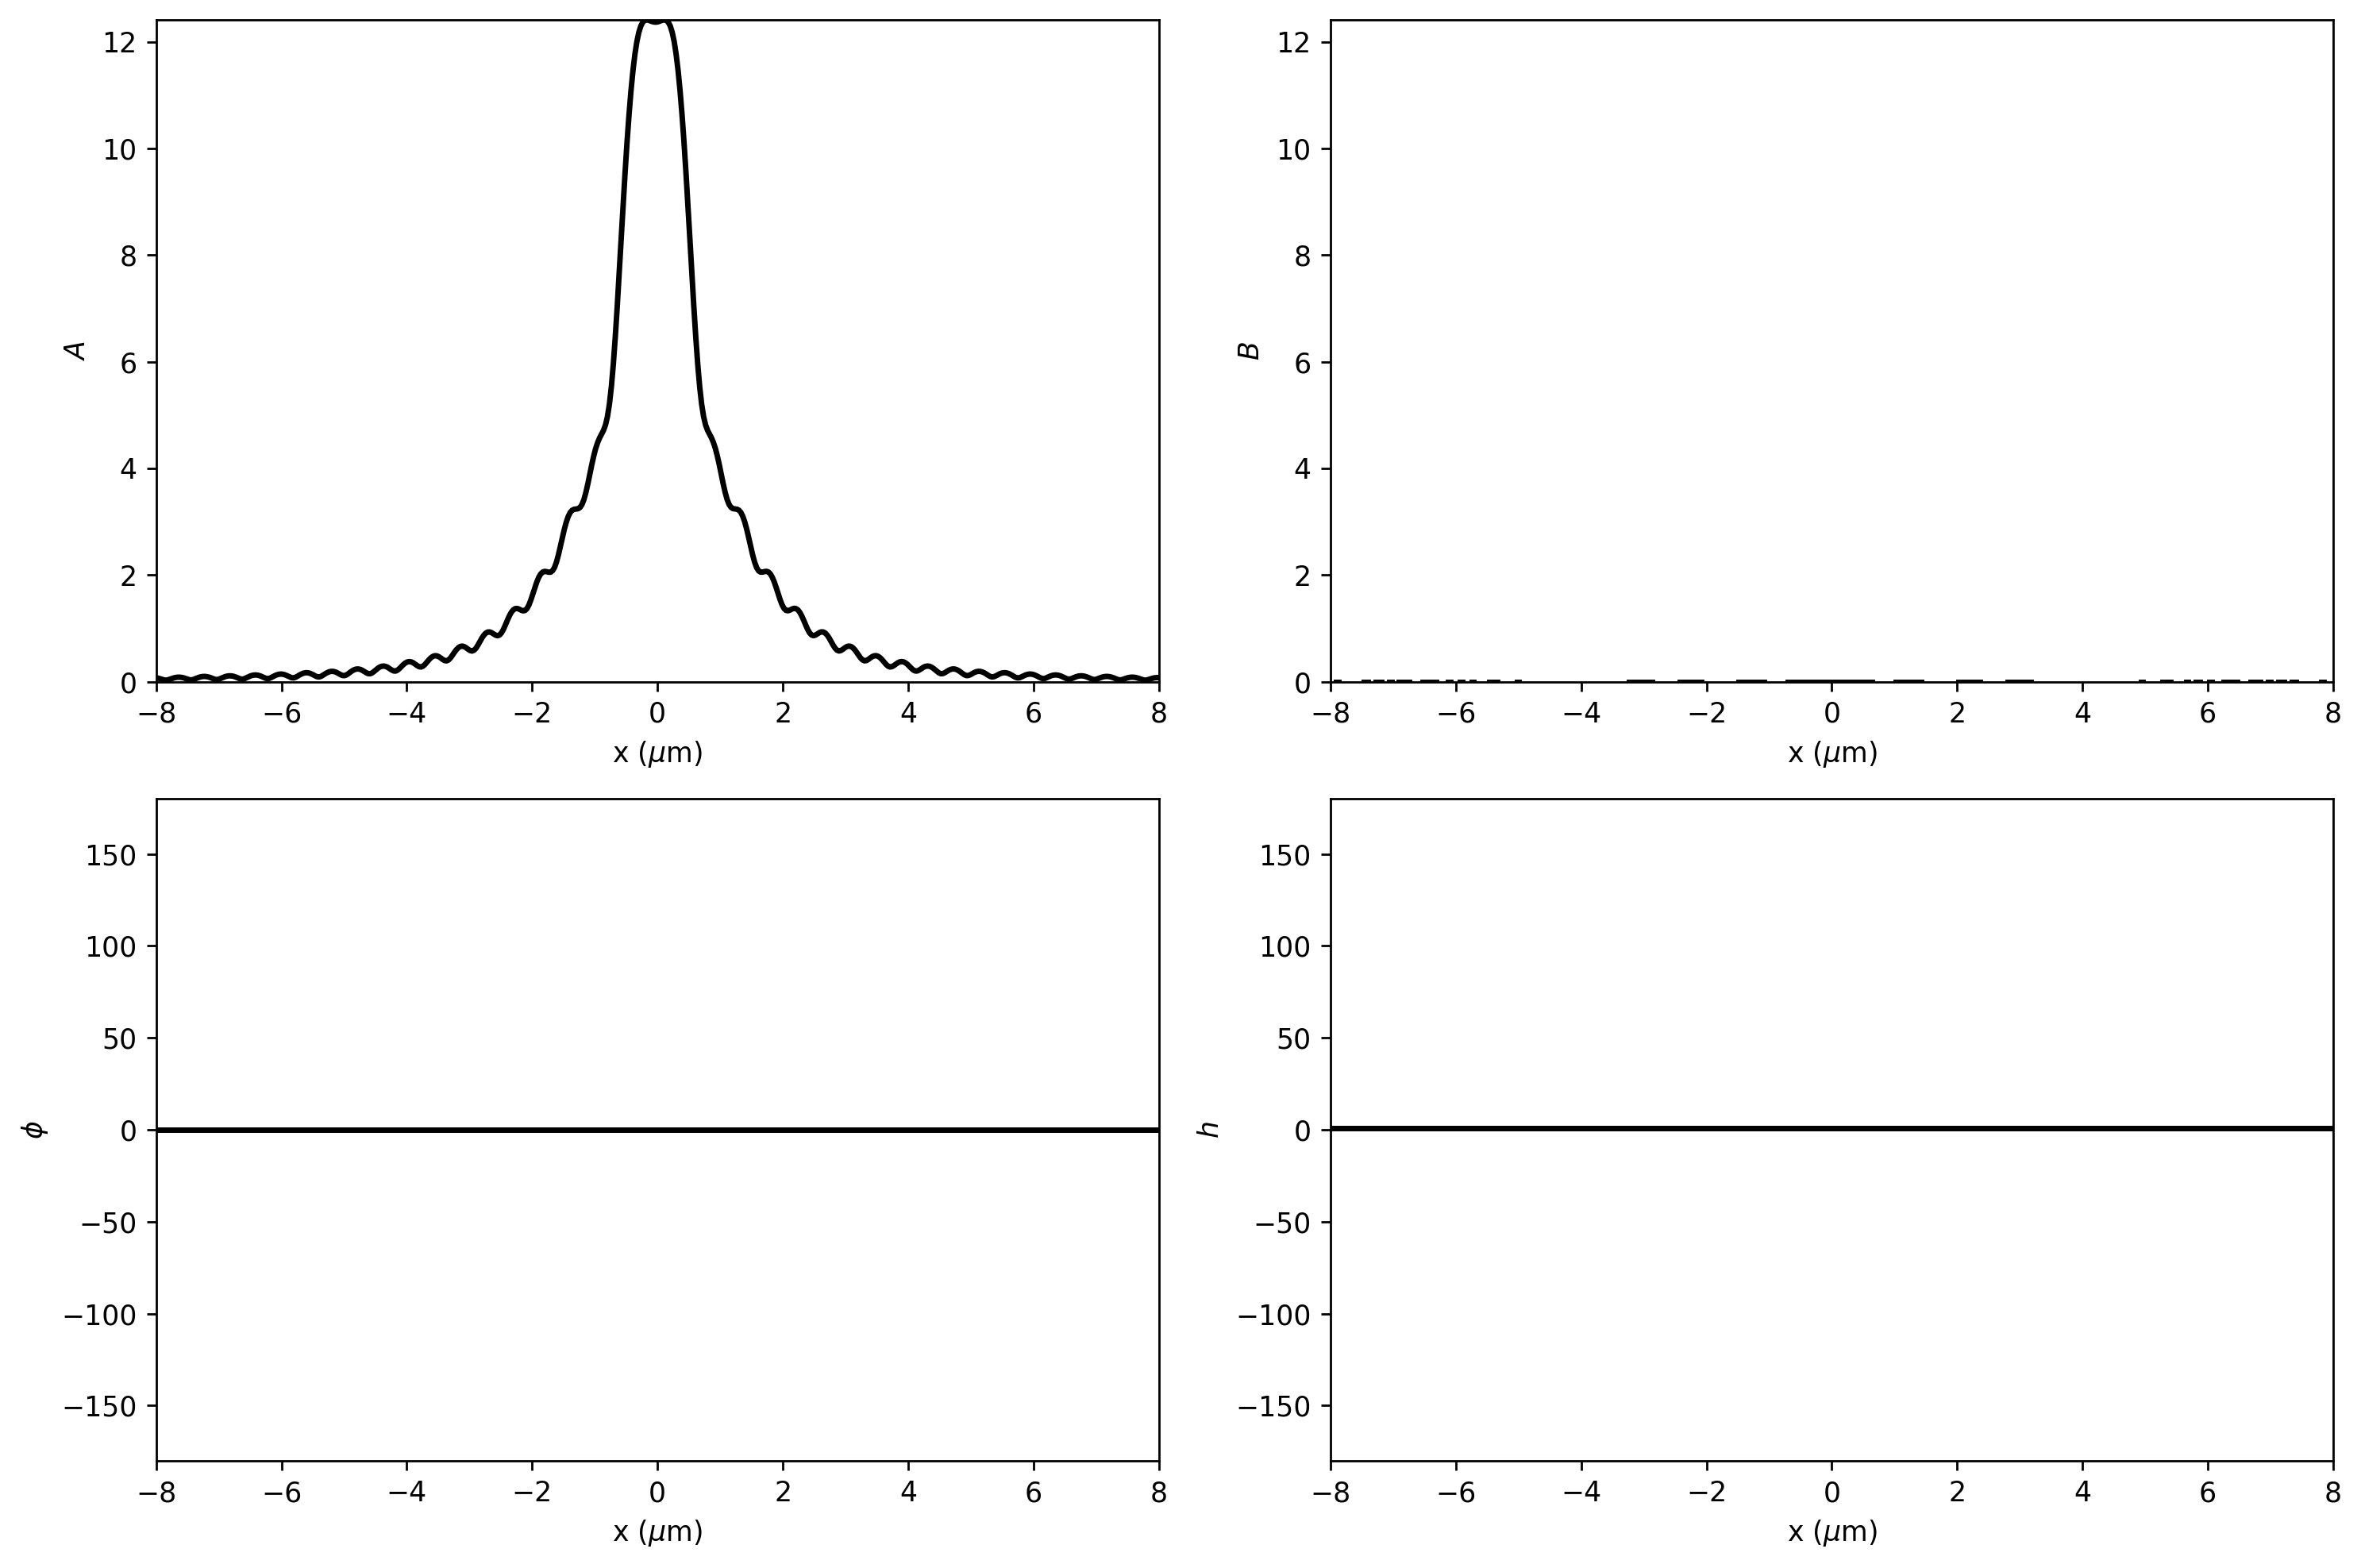

In [40]:
EM2_1D.draw('param_ellipses');


## xout: 0D, yout: 0D, z: 1D


In [41]:
x_out = 0.
y_out = 0.
z = np.linspace(focal - 4 * um - 6 * um, focal - 2 * um + 6 * um, 64)


In [42]:
%%time
EM2=EM1.CZT(z, x_out, y_out, verbose=True);


CPU times: user 11.4 s, sys: 31.7 ms, total: 11.5 s
Wall time: 11.4 s


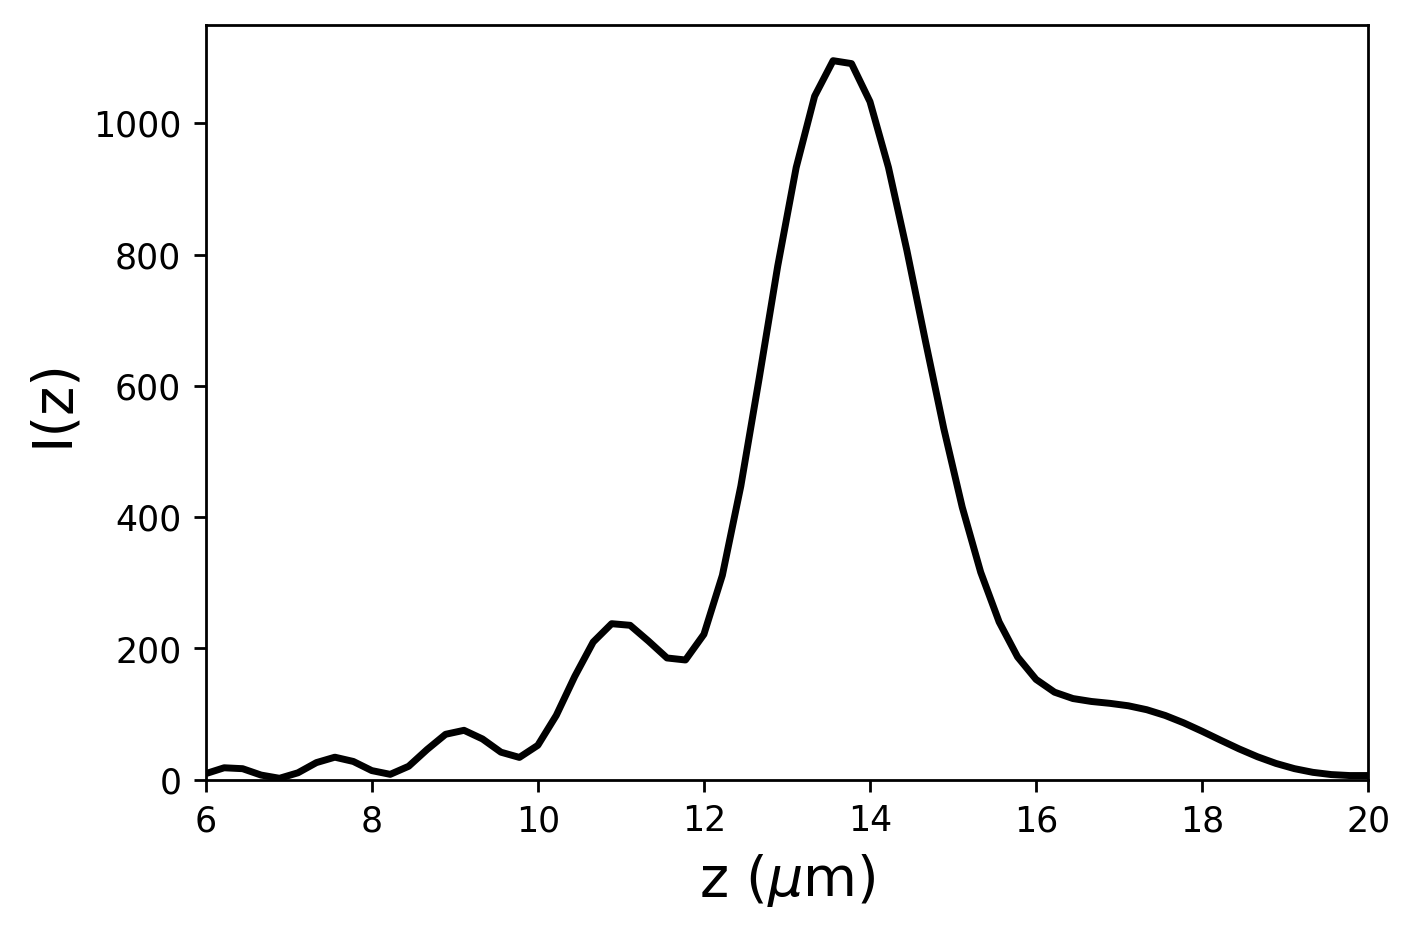

In [43]:
EM2.draw('intensity')


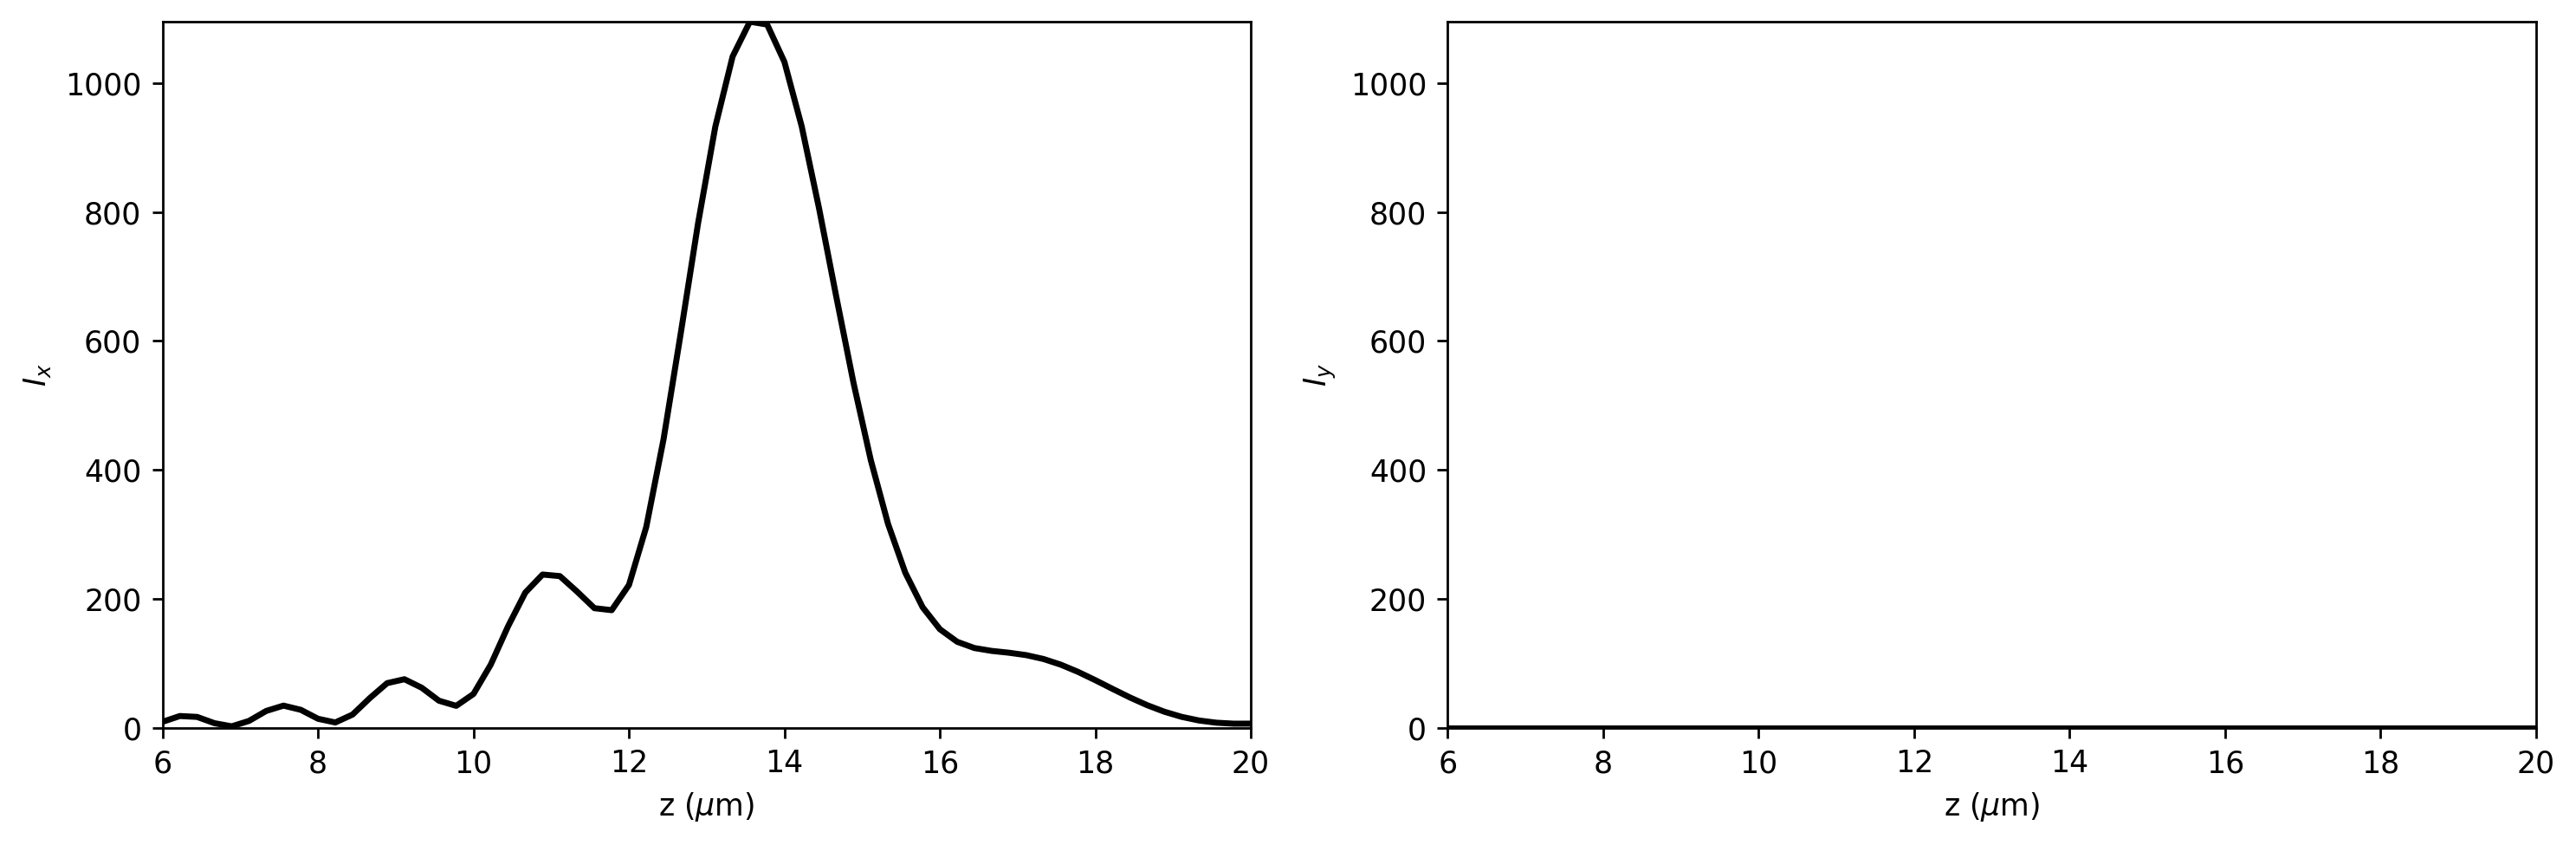

In [44]:
EM2.draw('intensities');


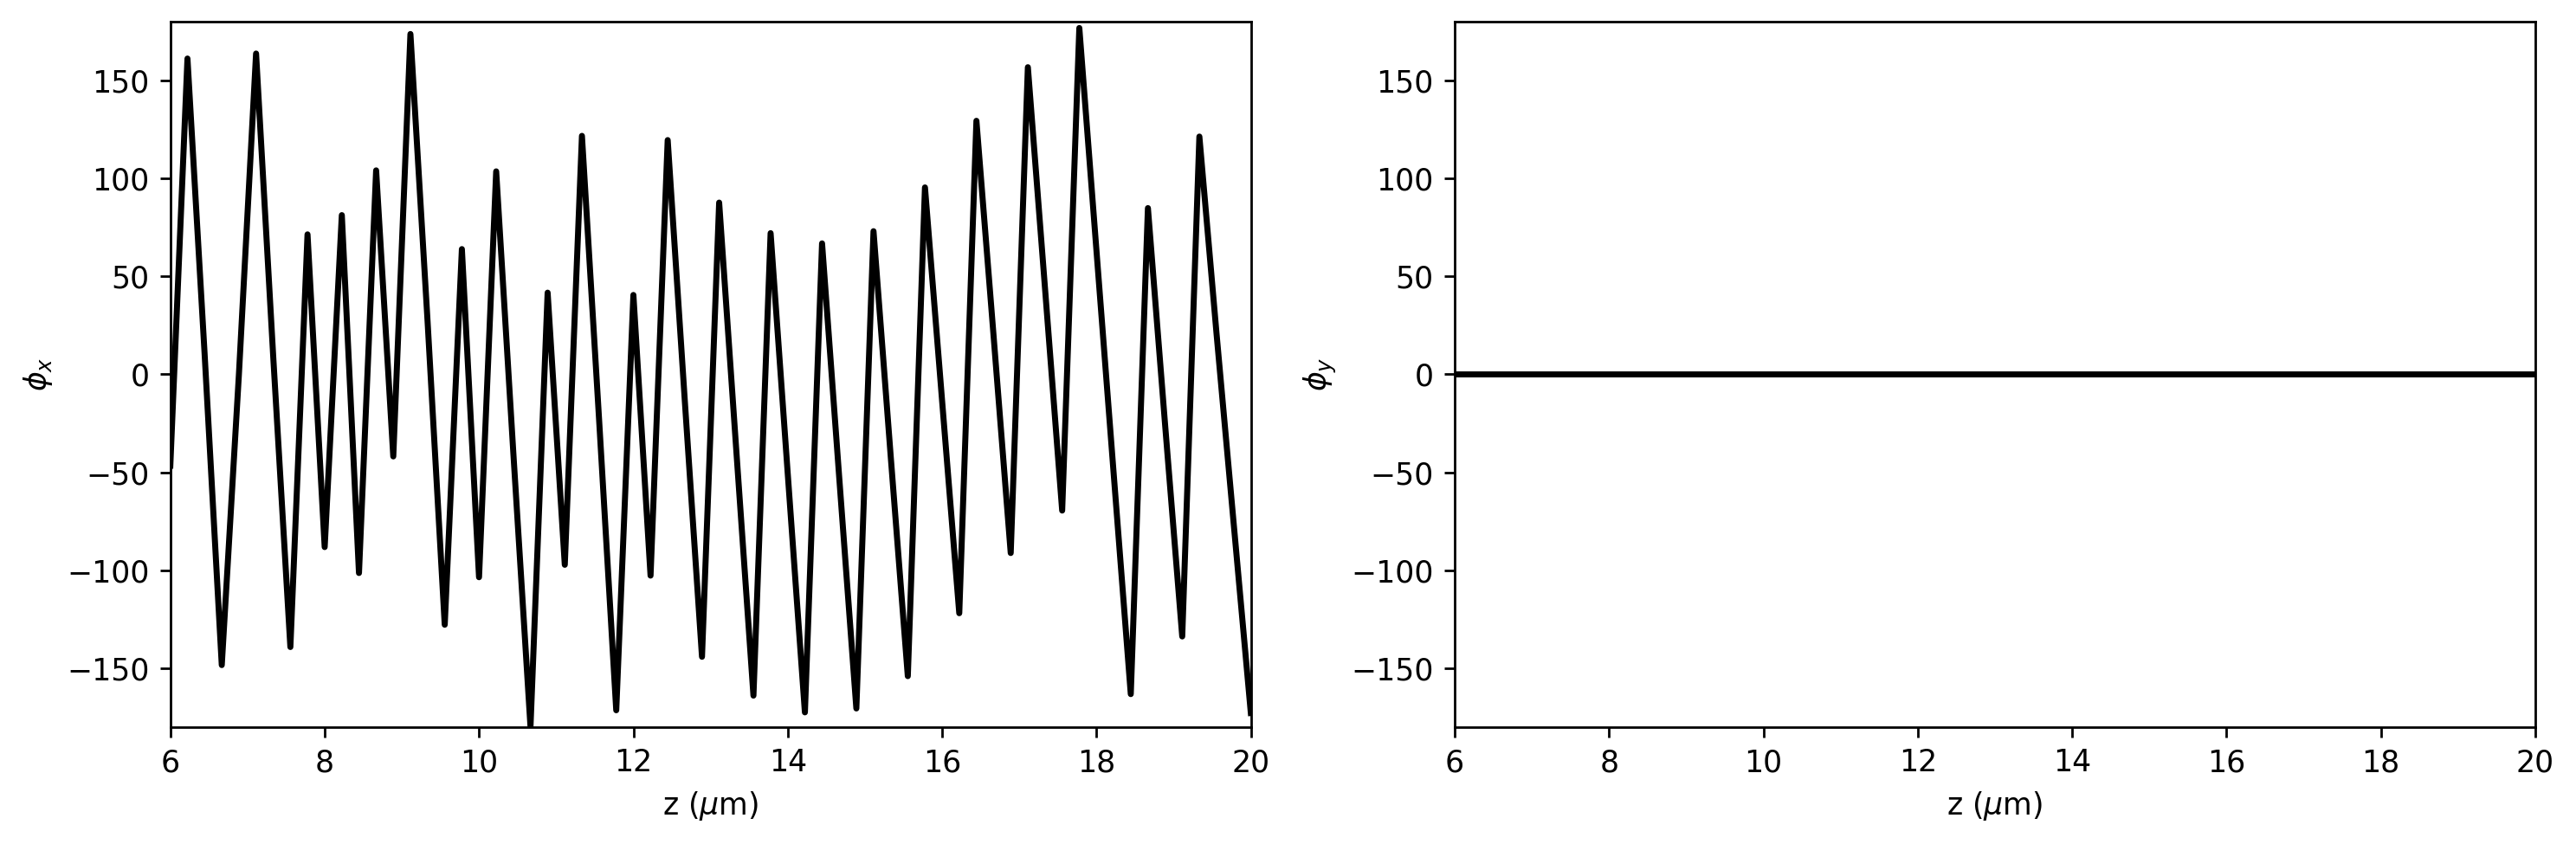

In [45]:
EM2.draw('phases');


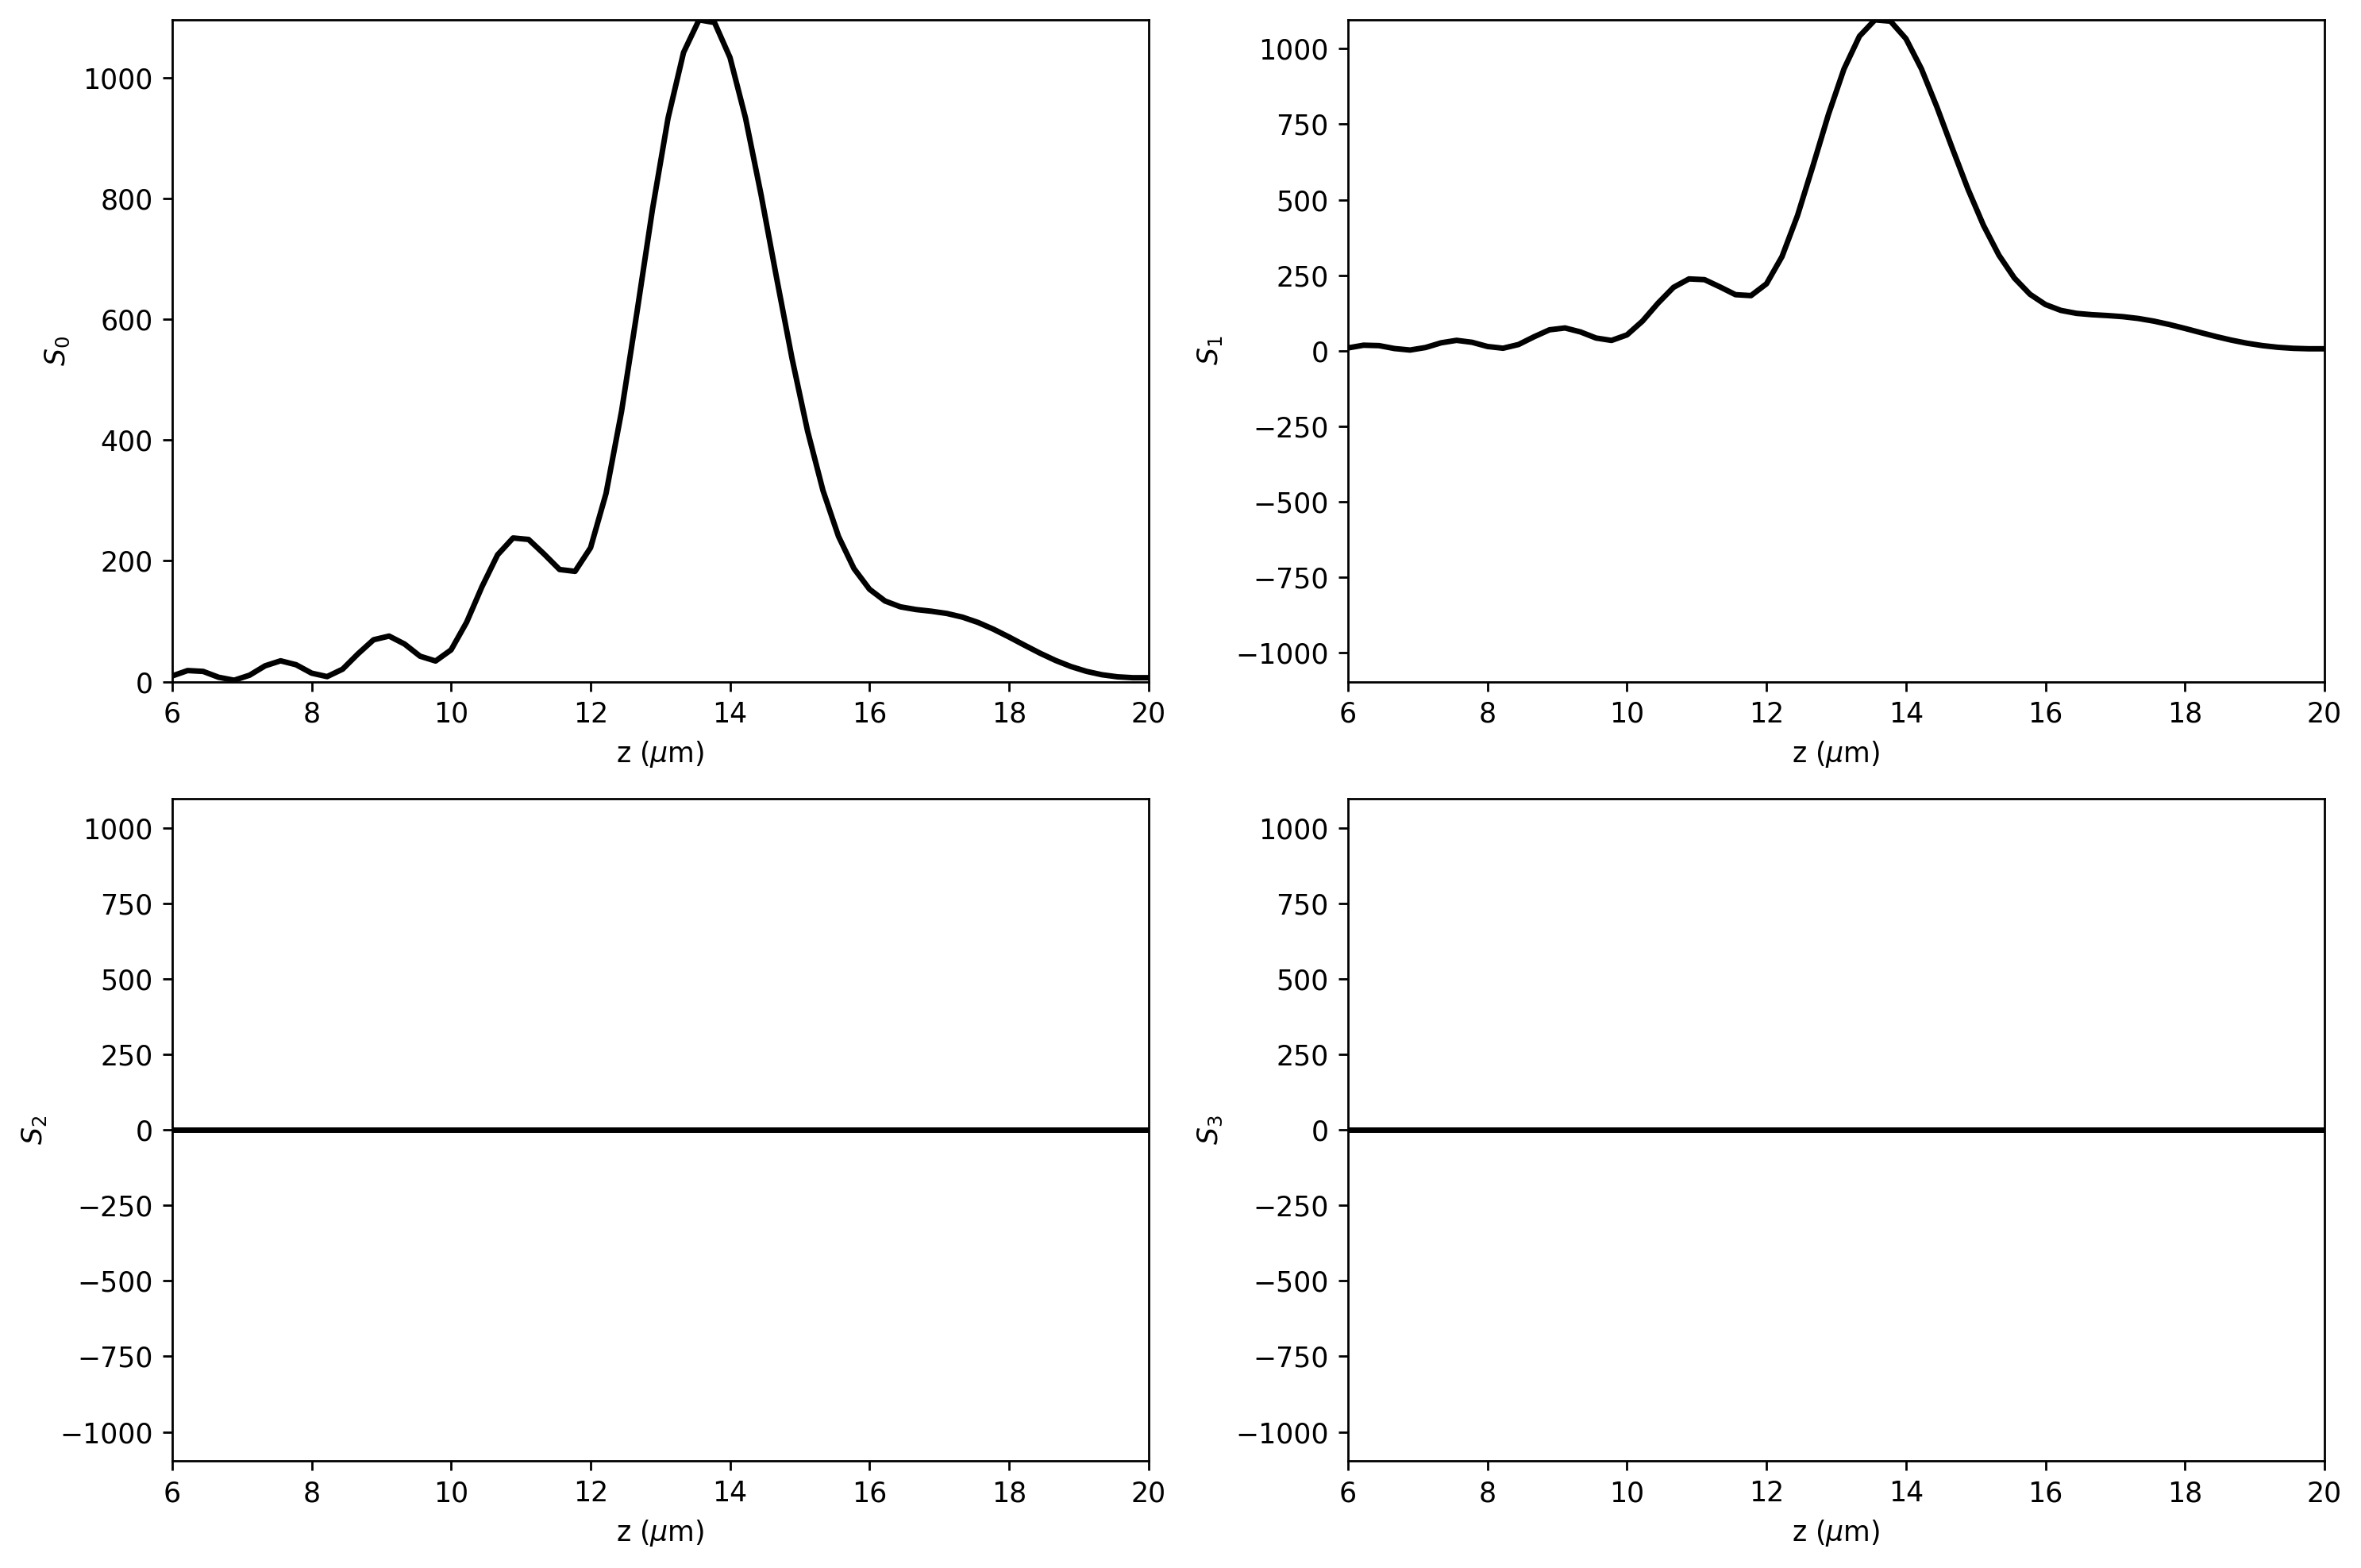

In [46]:
EM2.draw('stokes');


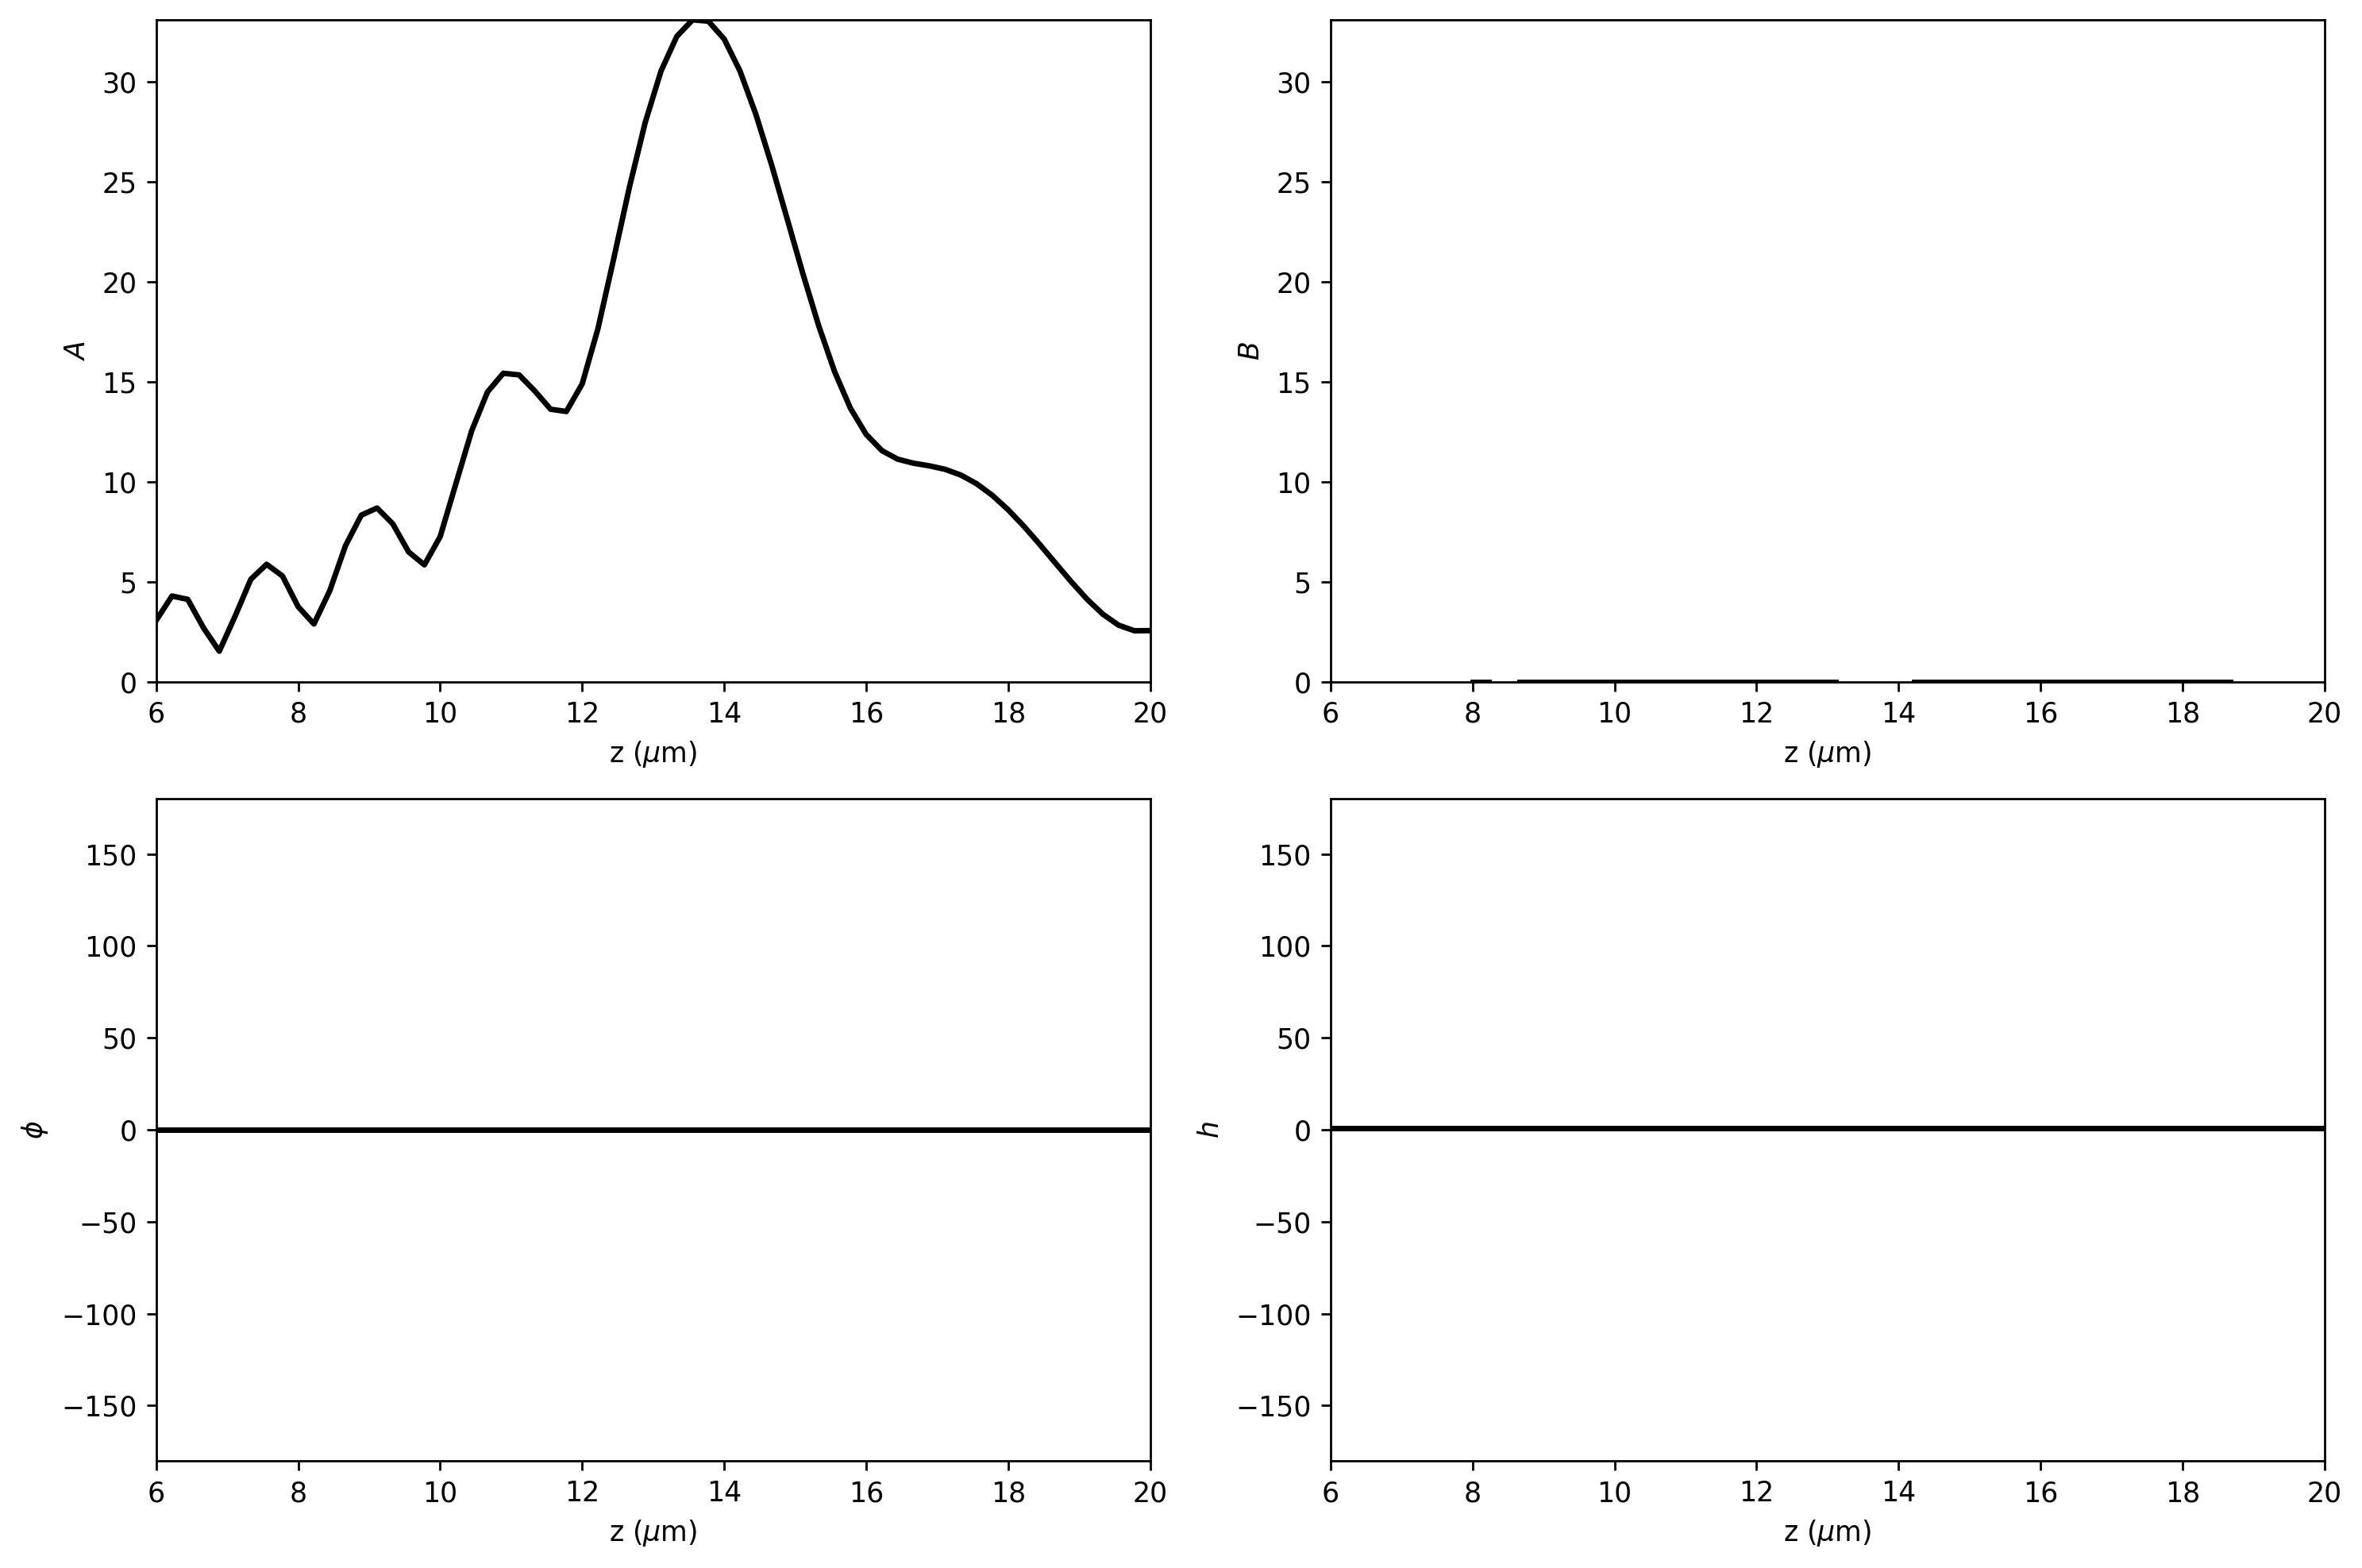

In [47]:
EM2.draw('param_ellipses');


## xout: 1D, yout: 0D, z: 1D


In [66]:
size_out = 5 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 256)
y_out = 0.
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 128)


In [67]:
%%time
EM2=EM1.CZT(z, x_out, y_out, verbose=True)


CPU times: user 18.8 s, sys: 11.3 ms, total: 18.8 s
Wall time: 18.7 s


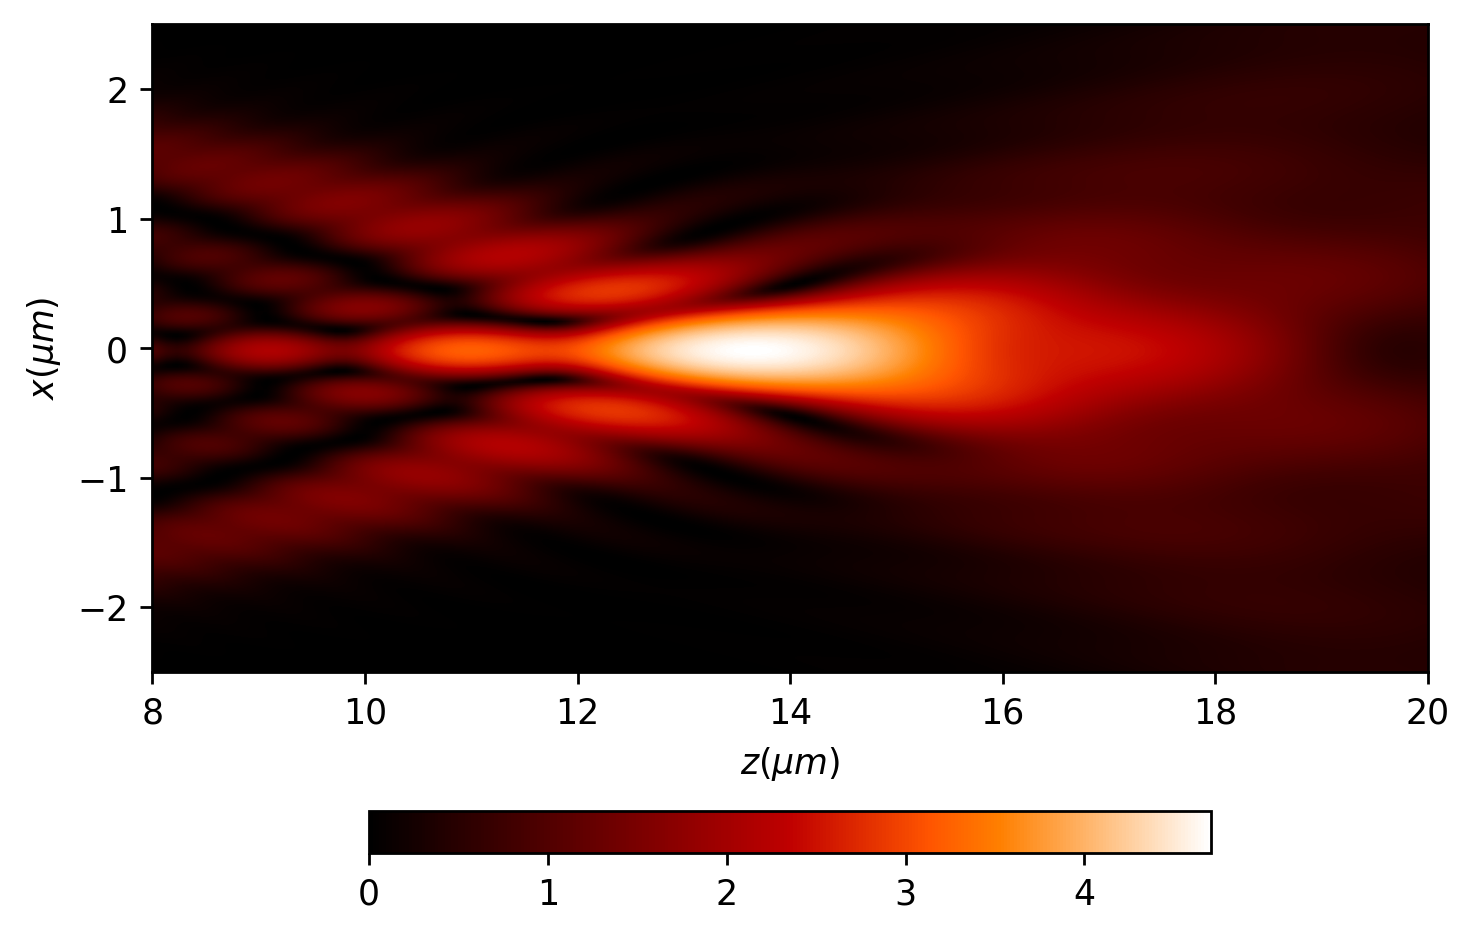

In [68]:
EM2.draw('intensity', logarithm=1e-1);

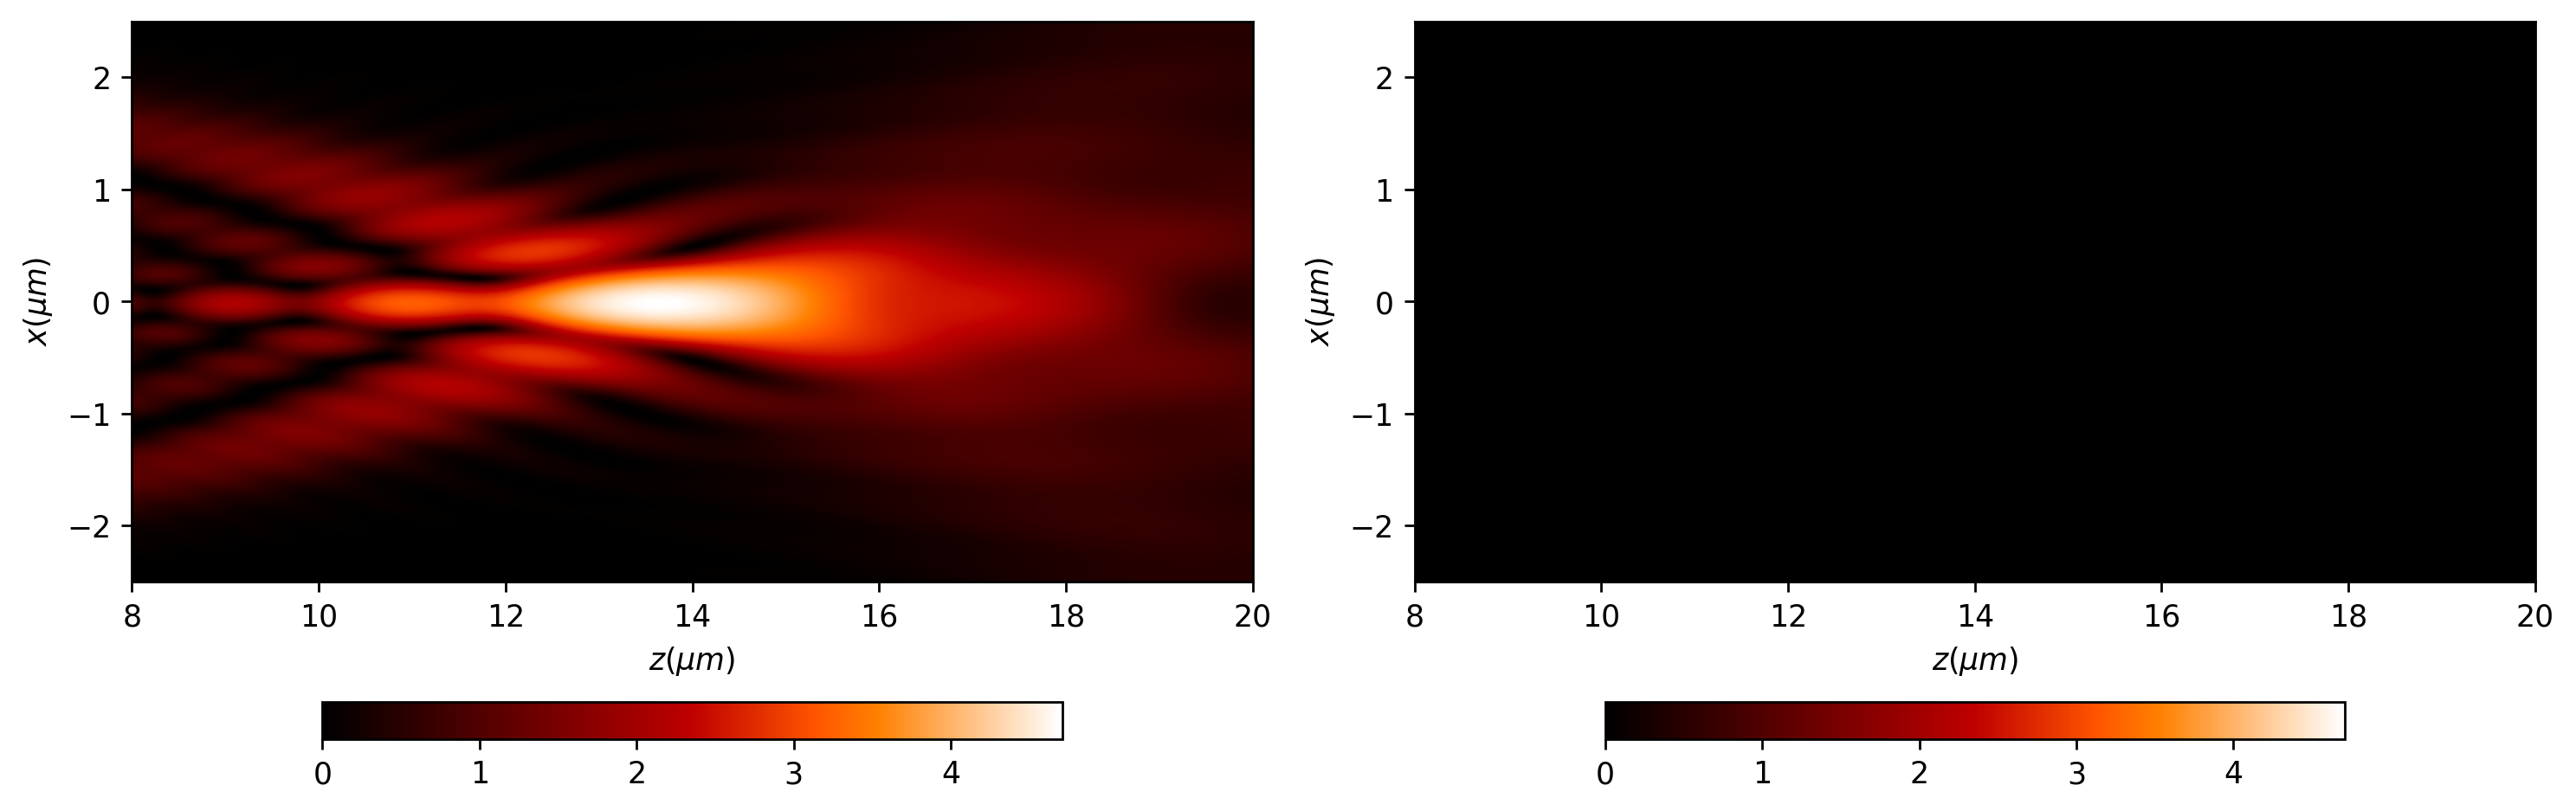

In [69]:
EM2.draw('intensities', logarithm=1e-1);

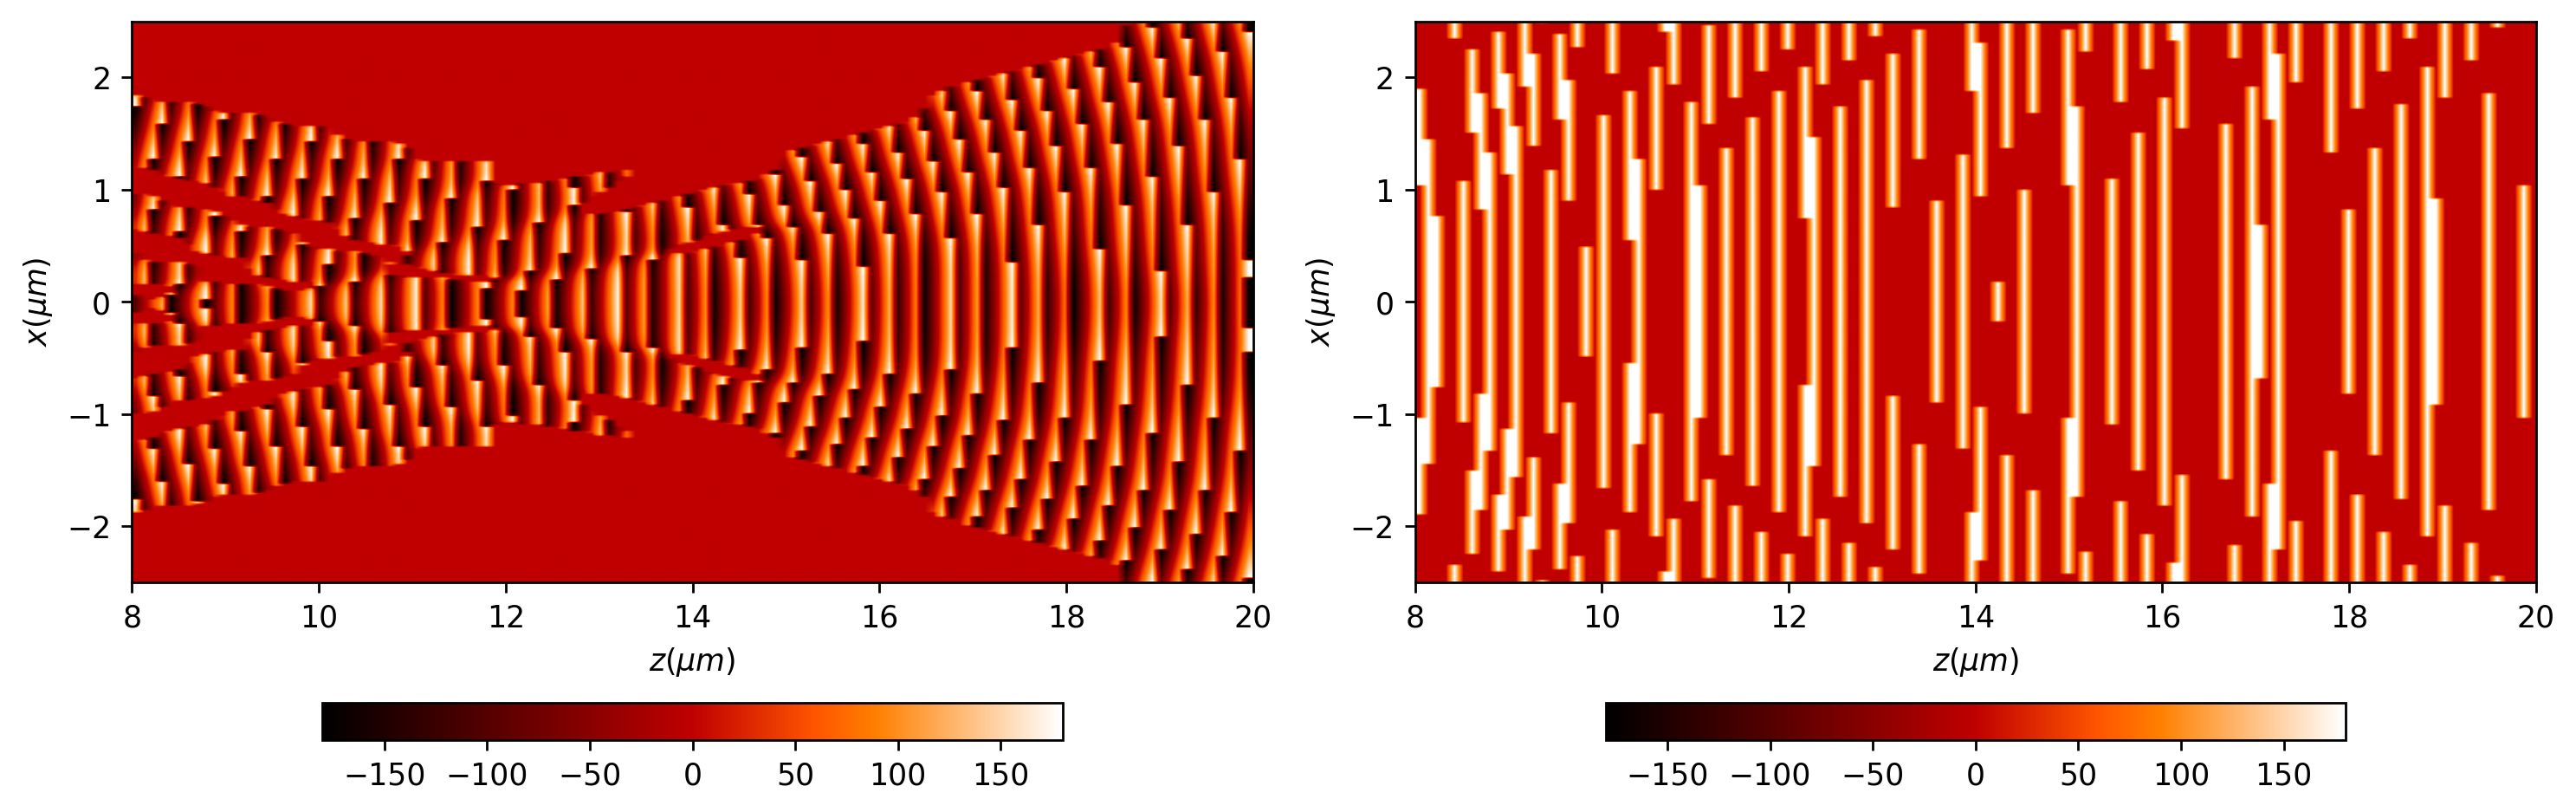

In [52]:
EM2.draw('phases');


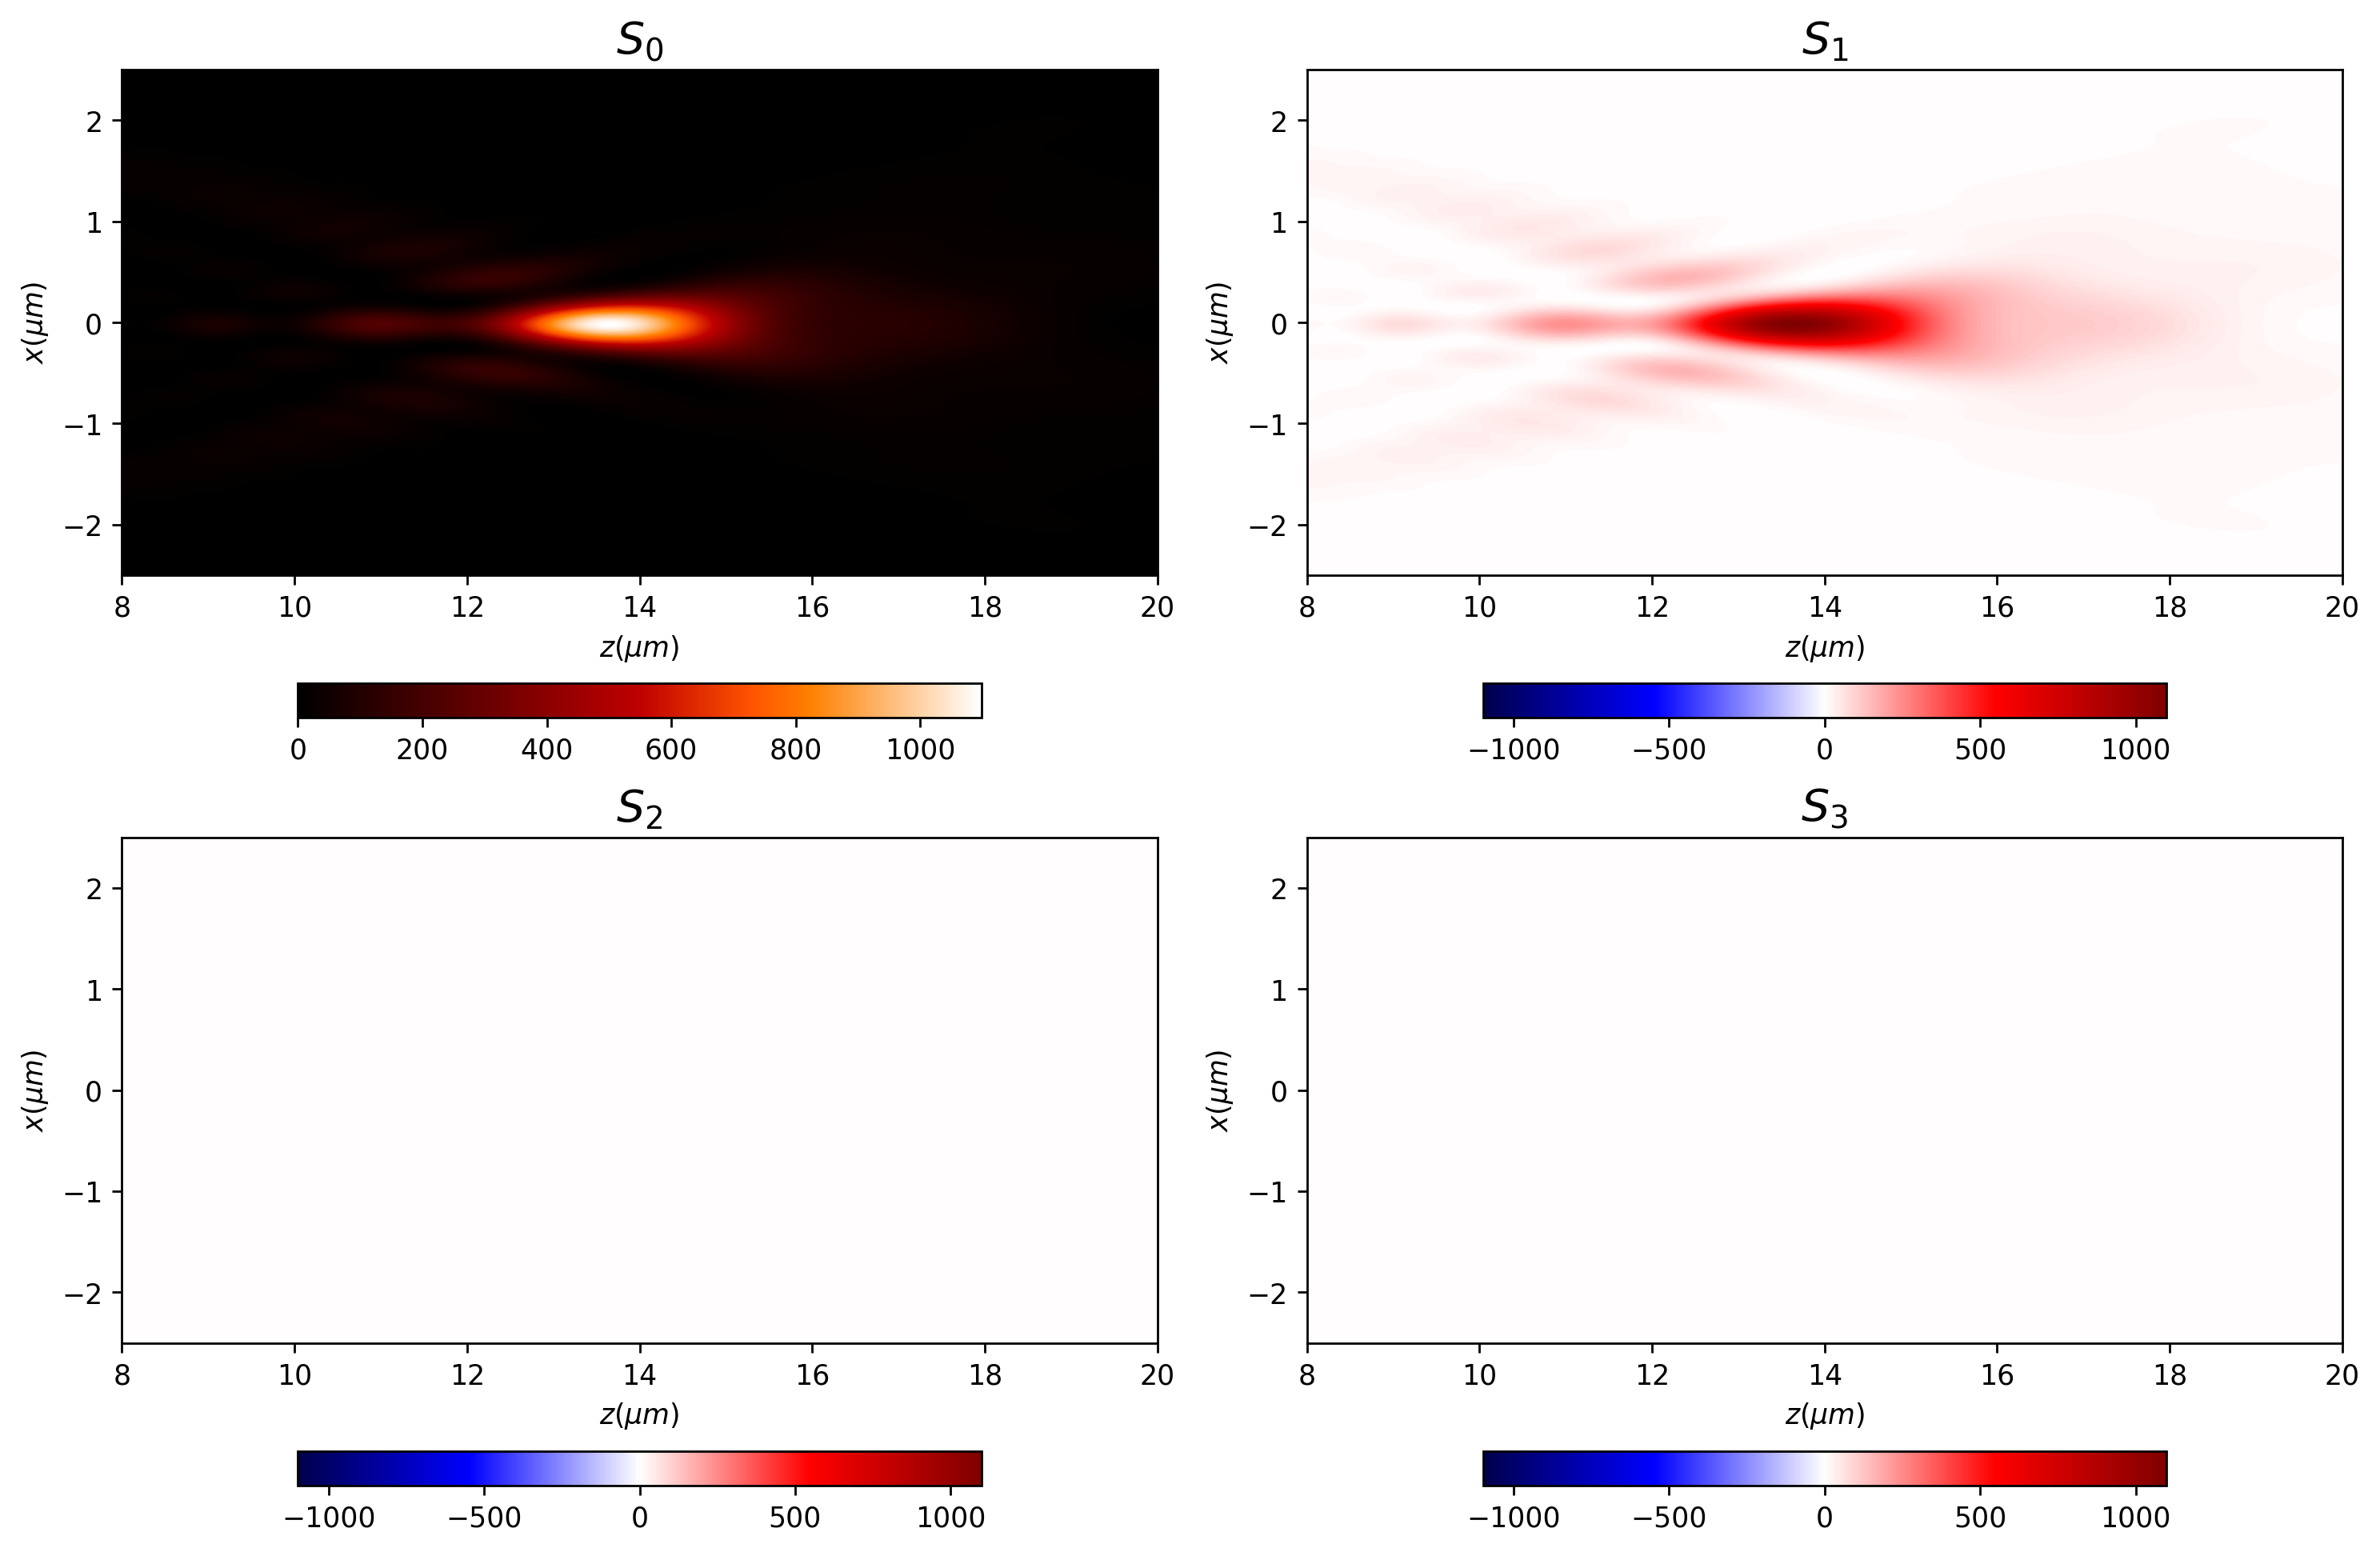

In [53]:
EM2.draw('stokes', logarithm=0);

## xout: 1D, yout: 1D, z: 0D


In [54]:
size_out = 3 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 256)
y_out = np.linspace(-size_out / 2, size_out / 2, 256)
z = focal-2

In [55]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


CPU times: user 380 ms, sys: 12 µs, total: 380 ms
Wall time: 380 ms


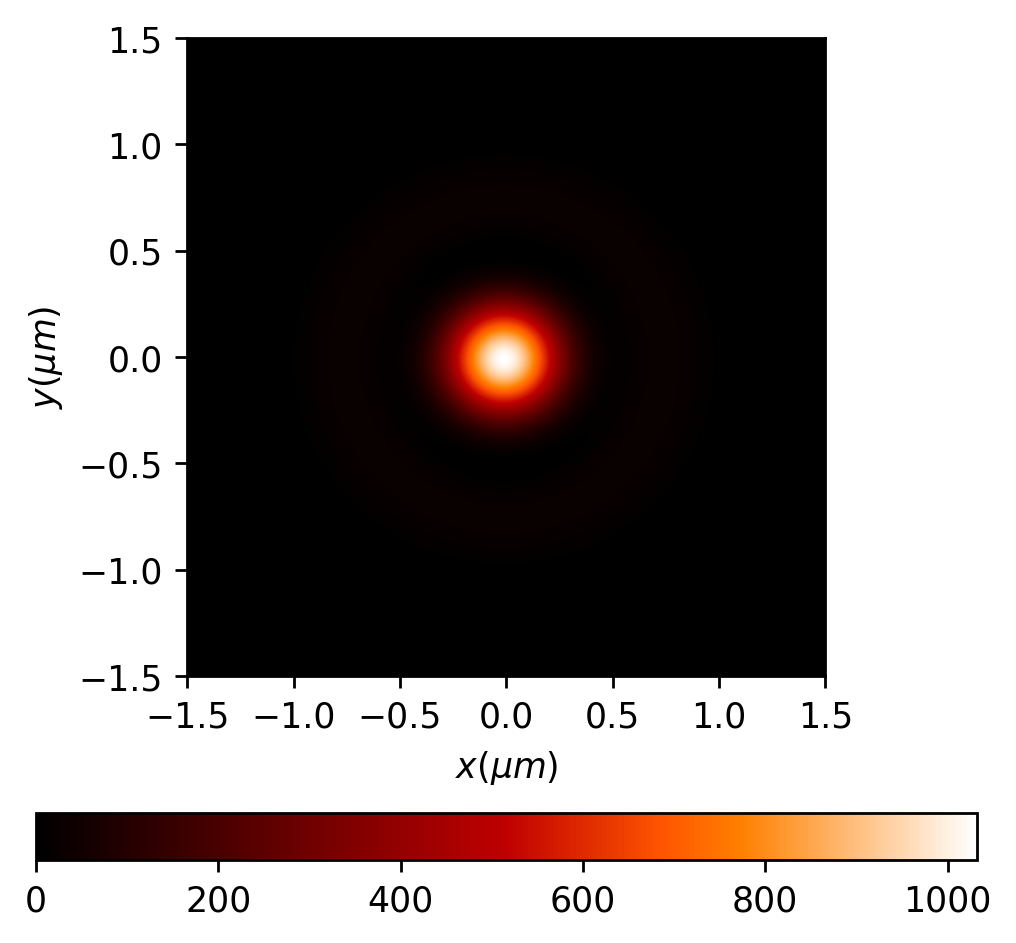

In [56]:
EM2.draw('intensity');


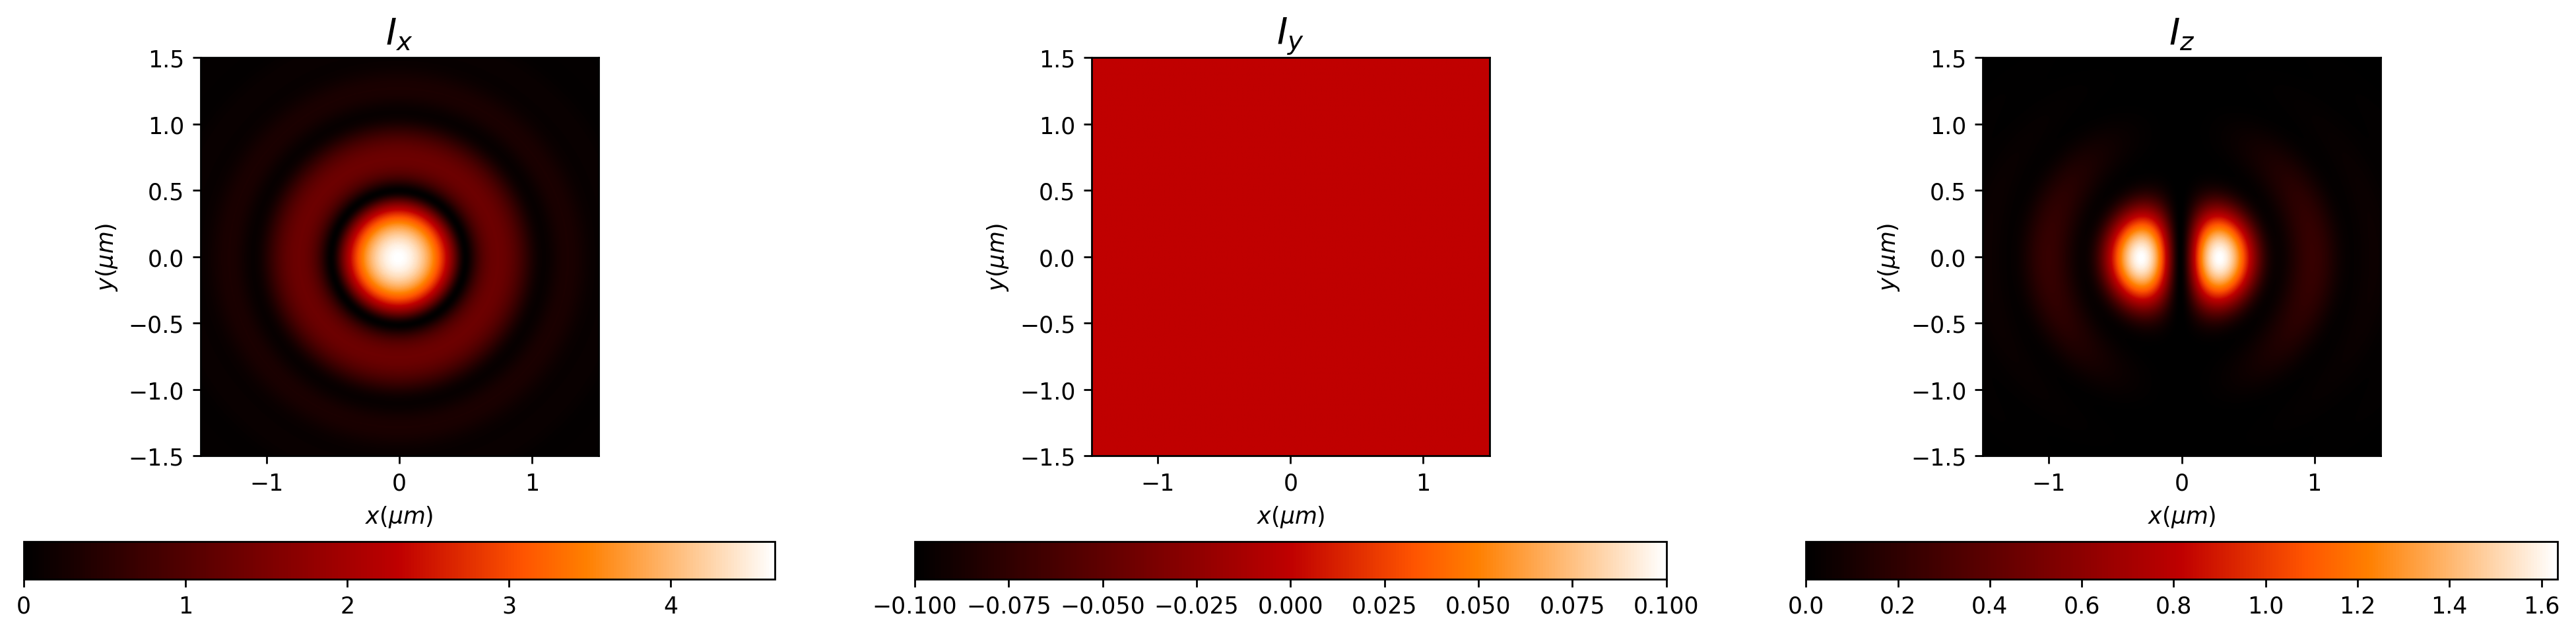

In [57]:
EM2.draw('intensities', logarithm=1e-1);


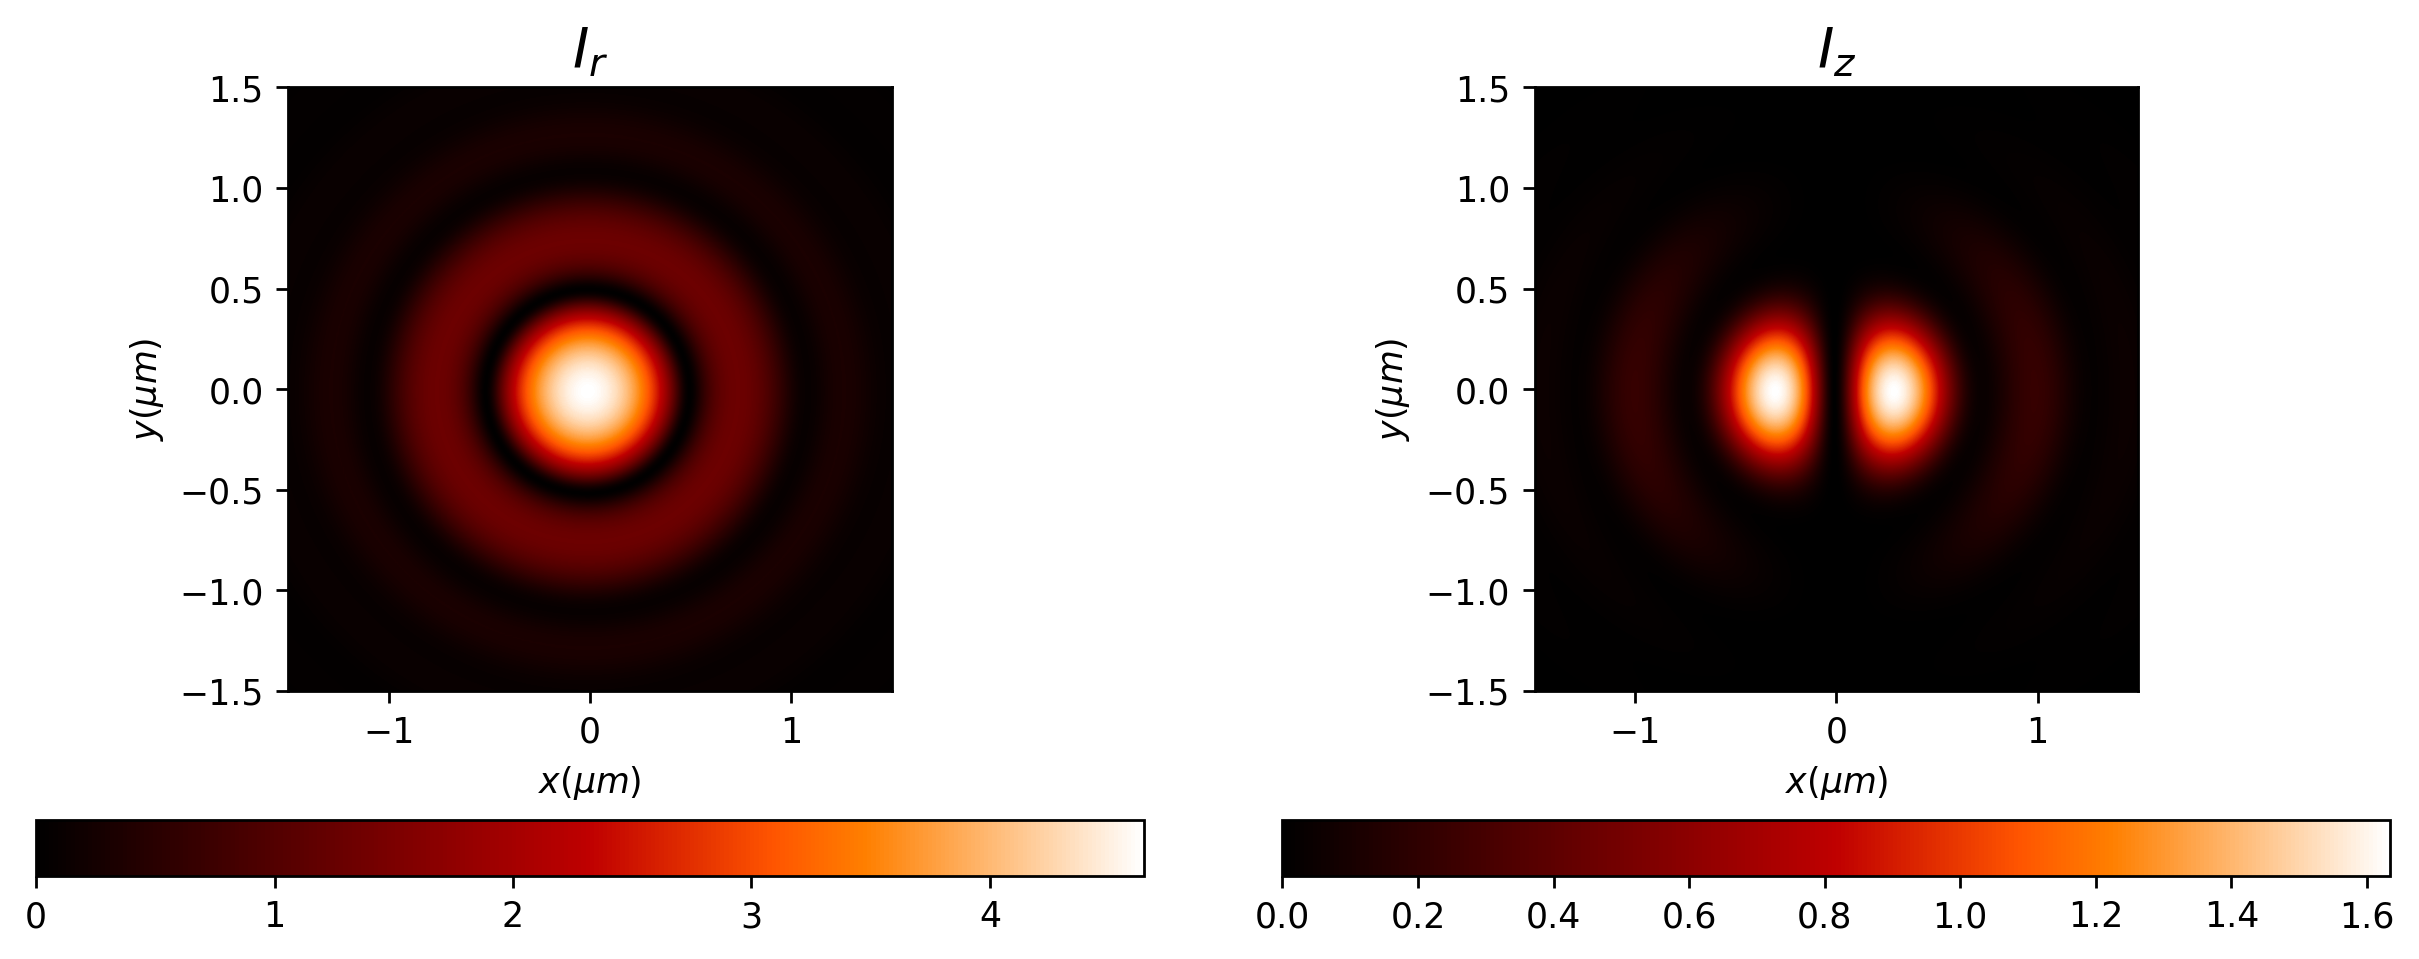

In [58]:
EM2.draw('intensities_rz', logarithm=1e-1)


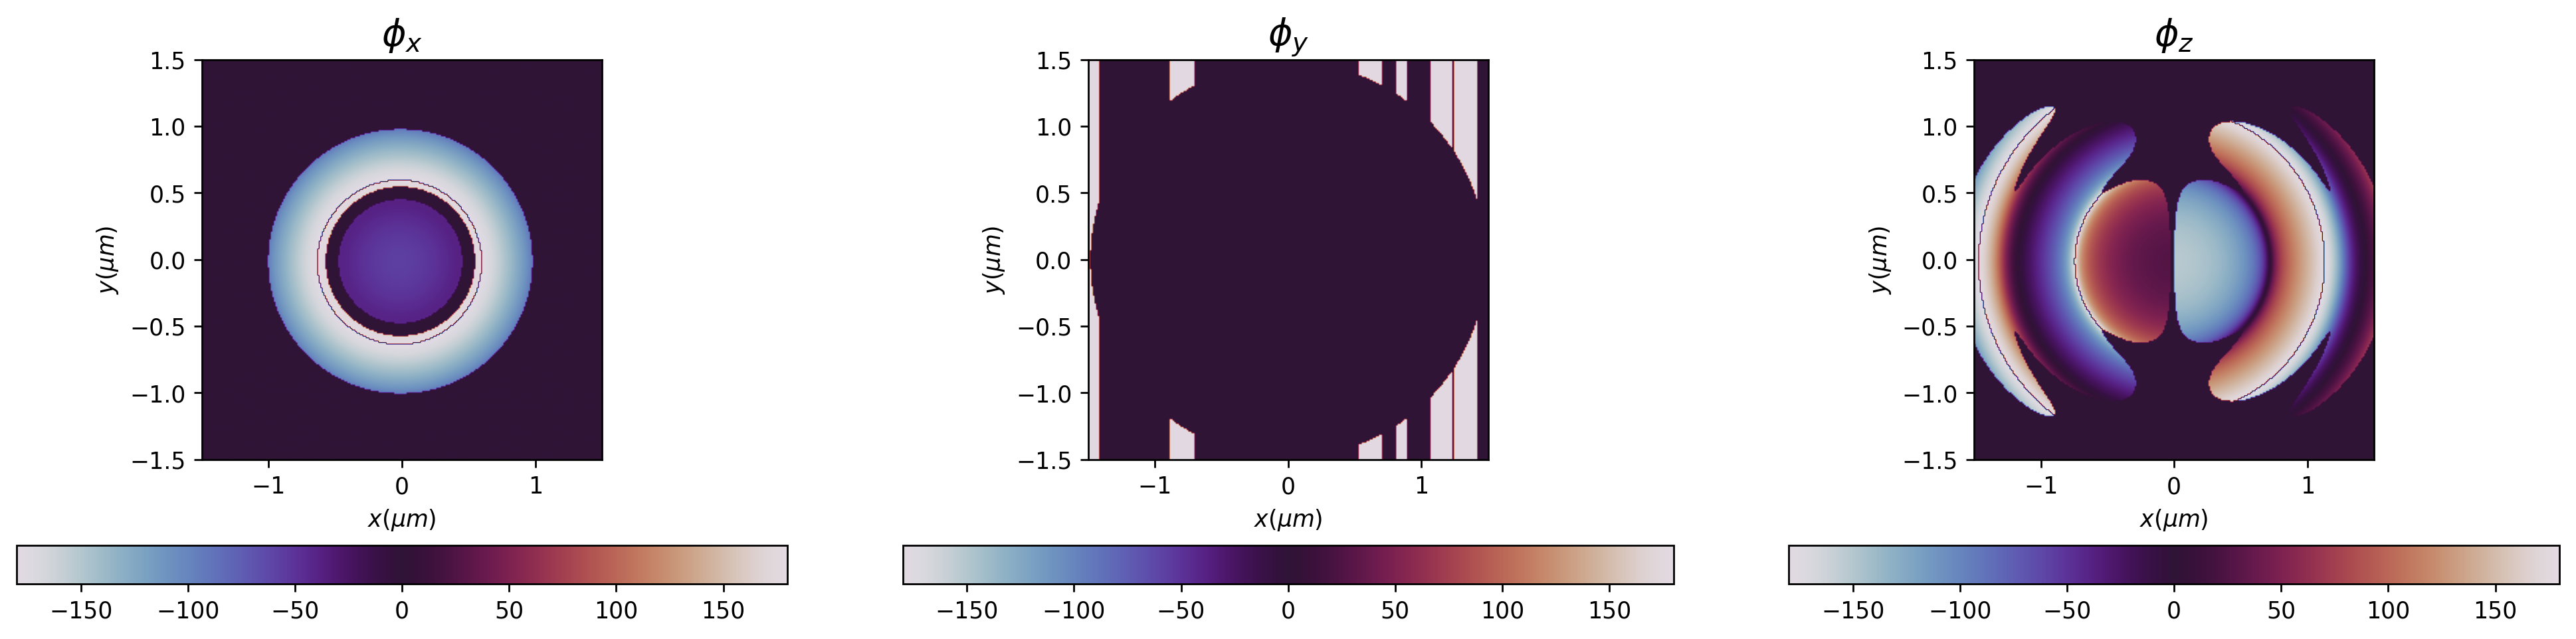

In [59]:
EM2.draw('phases');


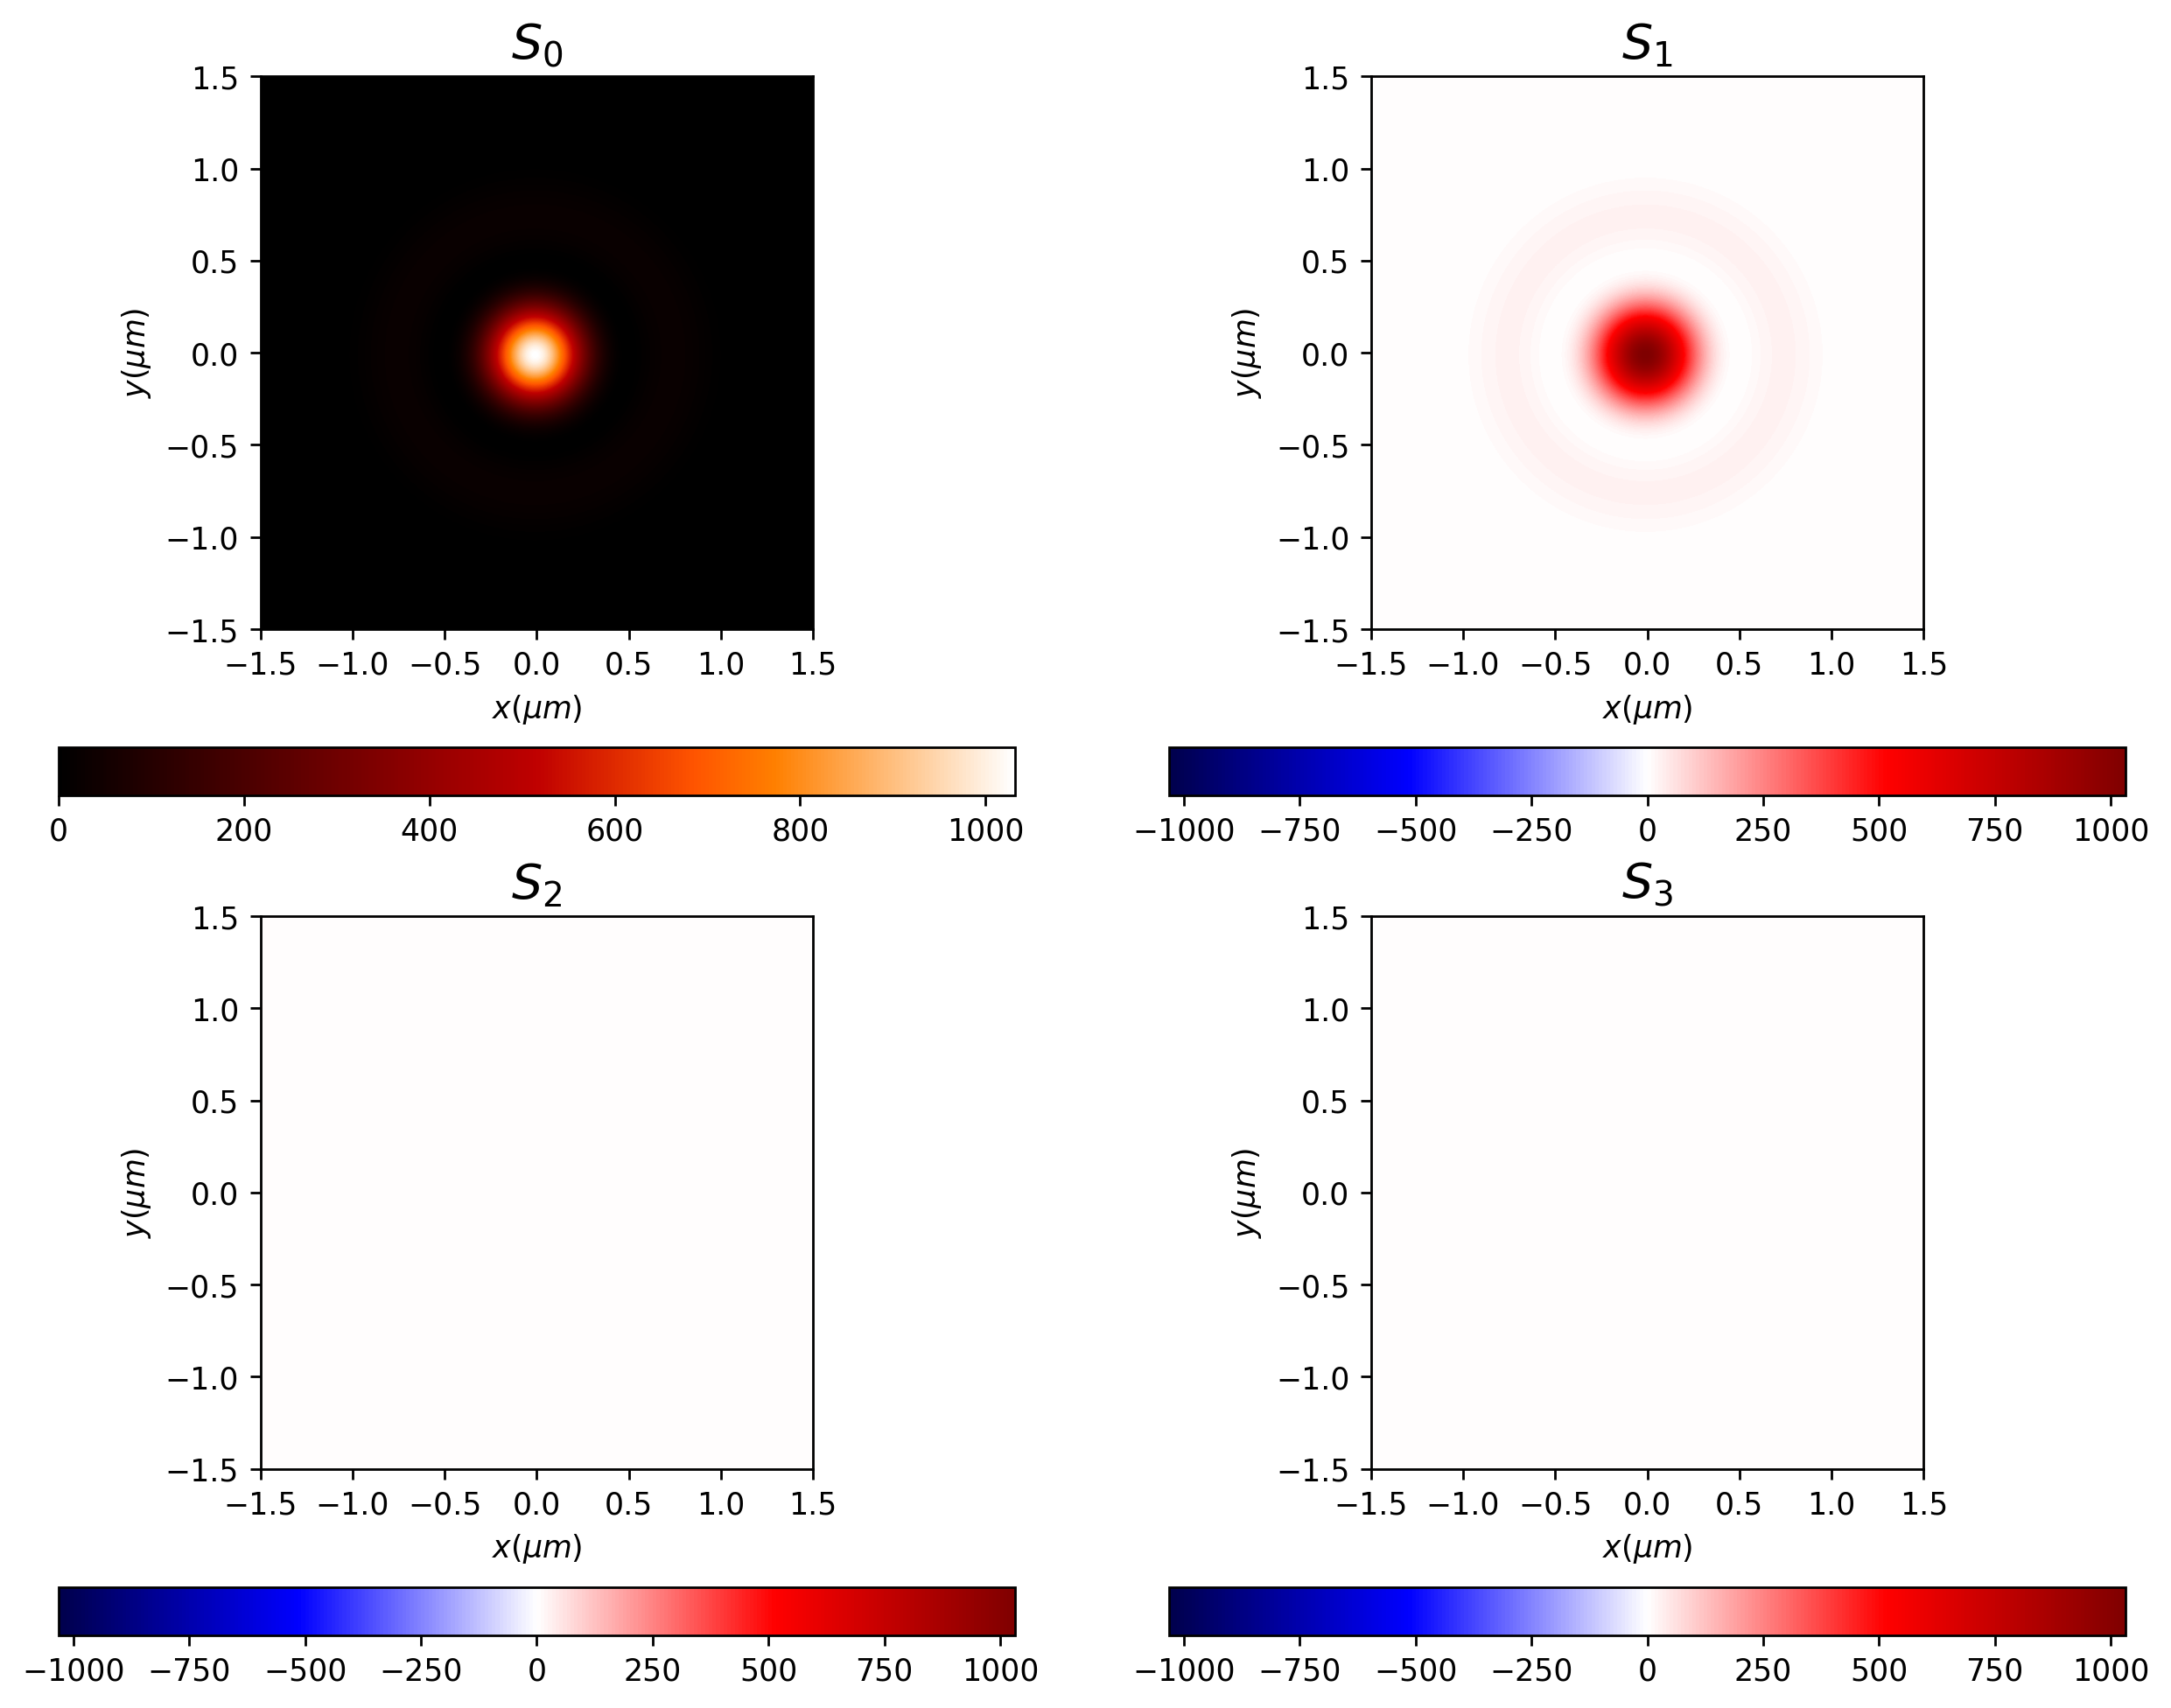

In [60]:
EM2.draw('stokes', logarithm=0);


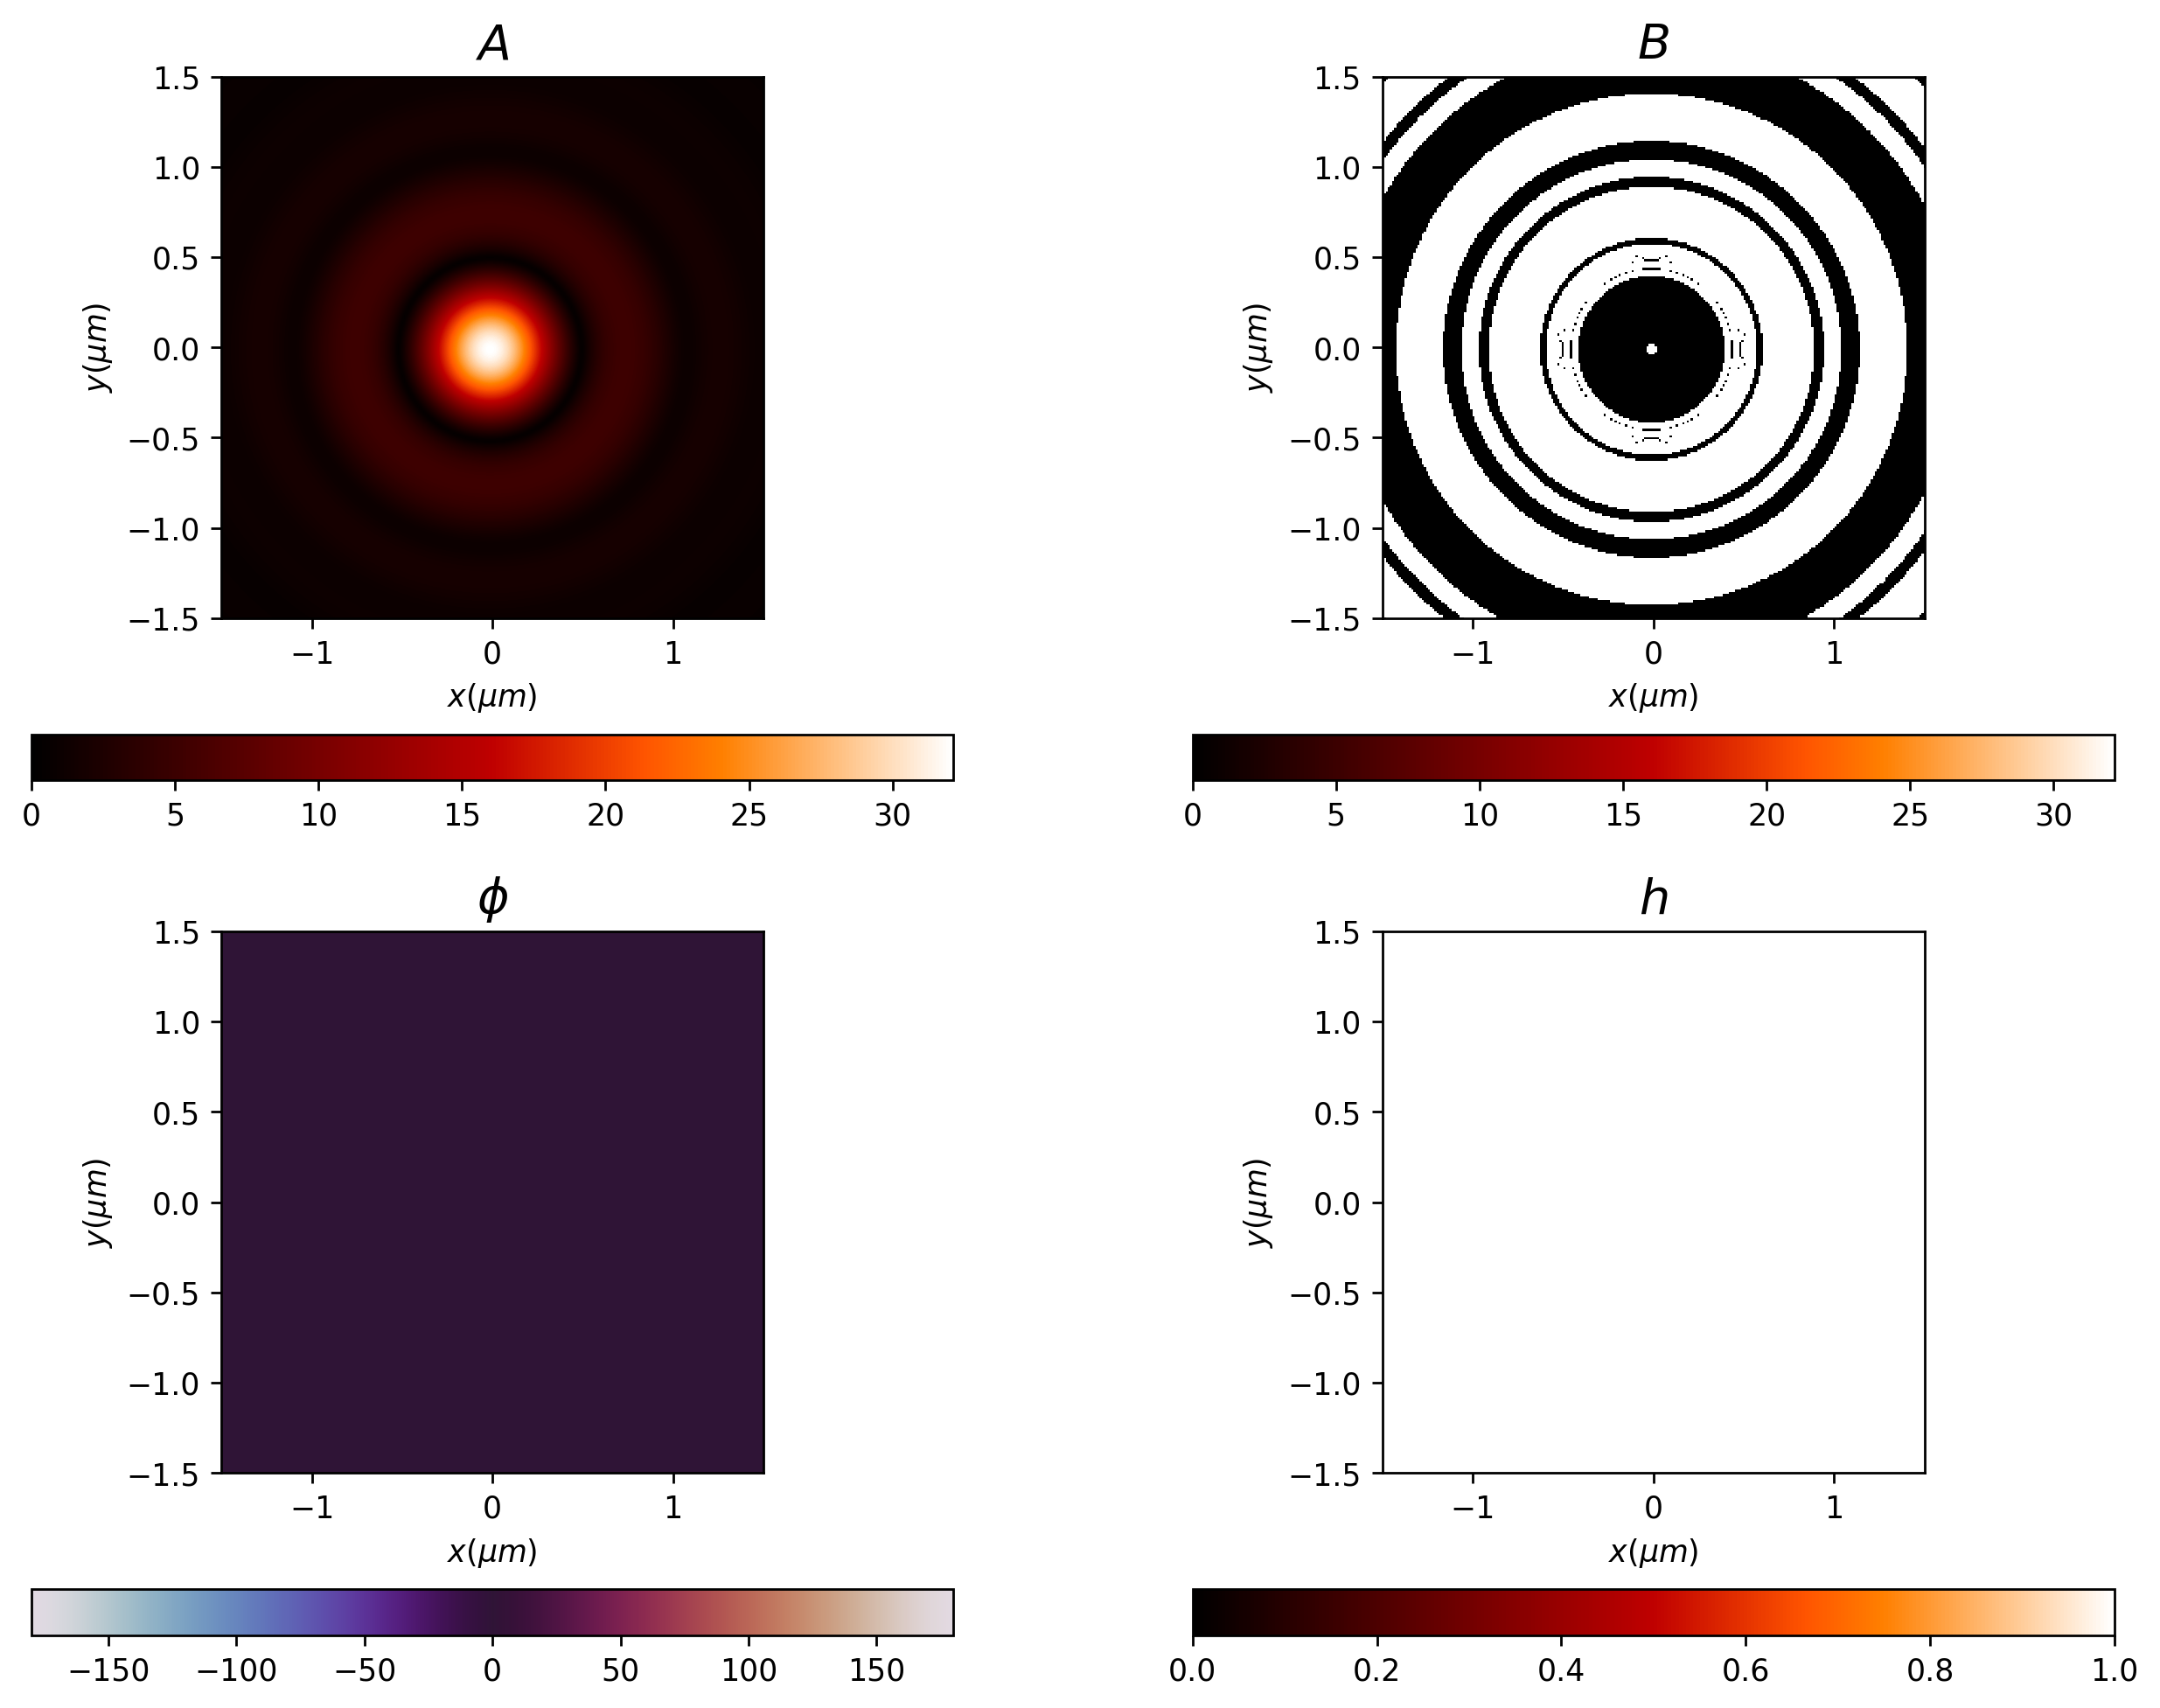

In [61]:
EM2.draw('param_ellipse');


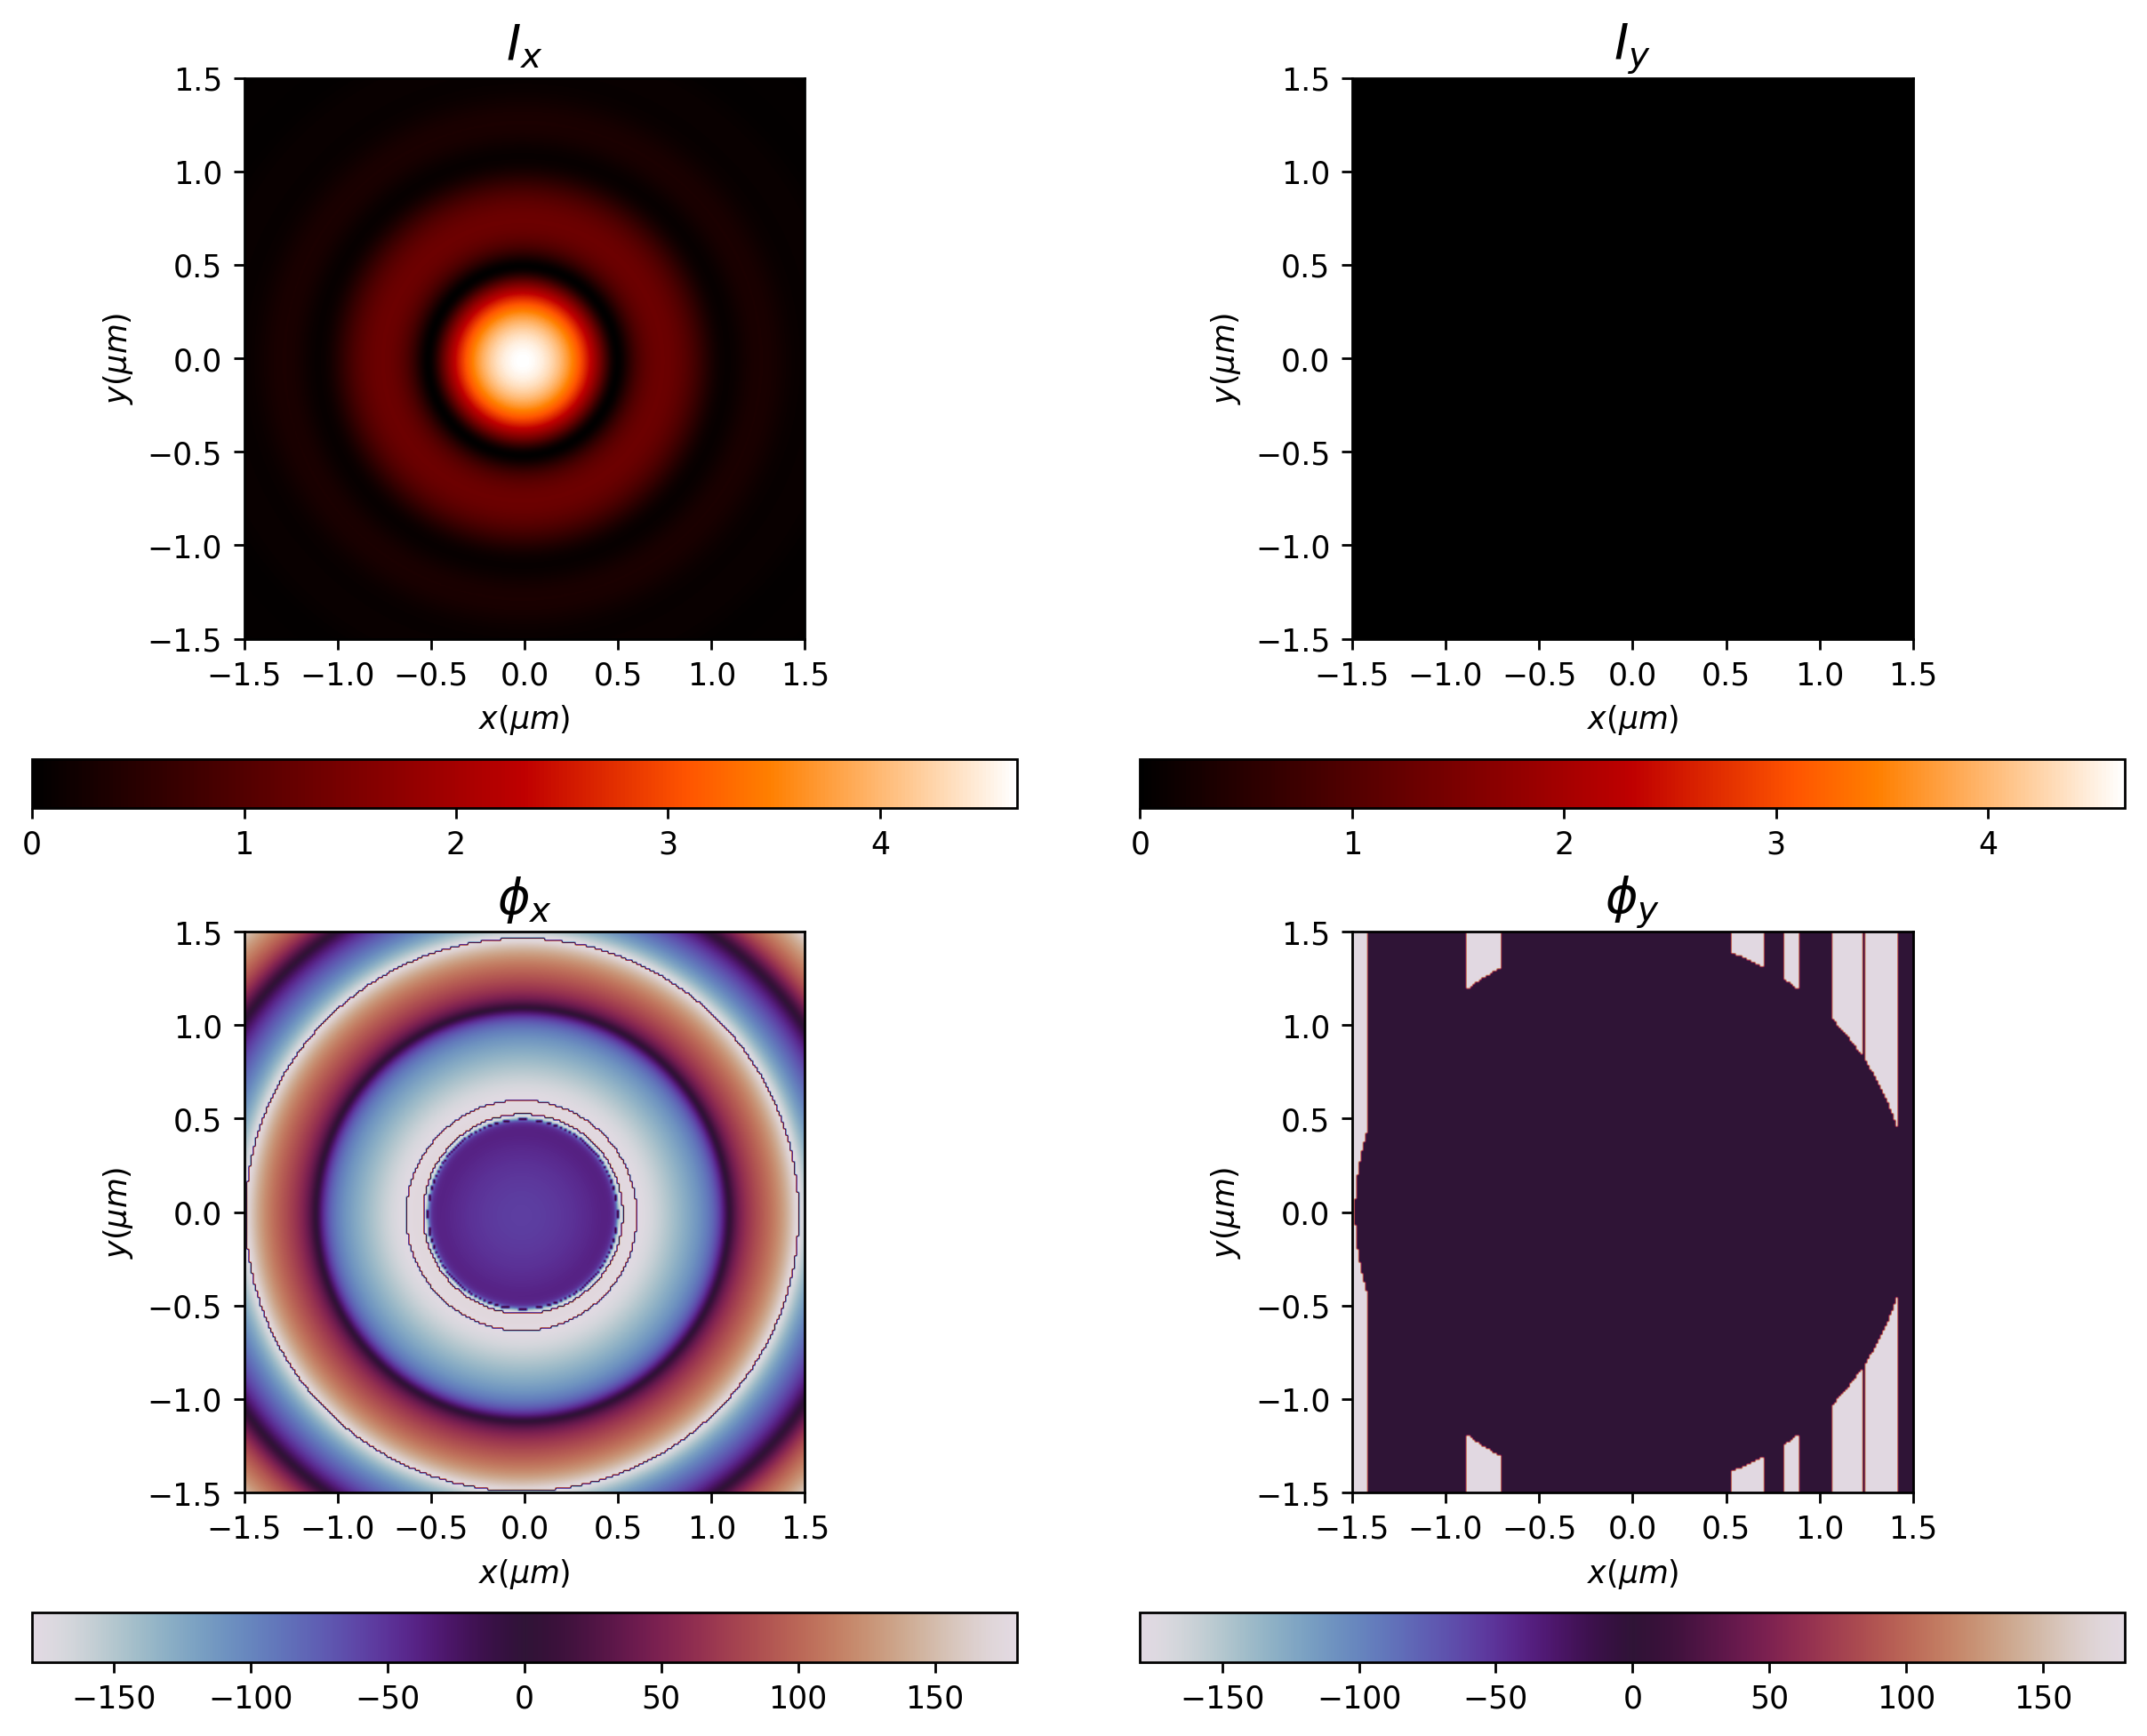

In [62]:
EM2.draw('fields', logarithm=1e-1);


## xout: 1D, yout: 1D, z: 1D


In [63]:
size_out = 2 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 64)
y_out = np.linspace(-size_out / 2, size_out / 2, 64)
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 16)


In [70]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


CPU times: user 19.6 s, sys: 7.33 ms, total: 19.6 s
Wall time: 19.5 s
